# Project 5: Application - Twitter Data

In [ ]:
import os
import json
import pytz
import math
import time
import warnings
import string
from string import punctuation
from time import mktime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import statsmodels.api as statsmodel
from textblob import TextBlob
import nltk
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.preprocessing import StandardScaler, normalize, Normalizer
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import auc, confusion_matrix, recall_score, roc_curve, precision_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict, KFold
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.neural_network import MLPRegressor
from collections import defaultdict
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import itertools
import re

warnings.filterwarnings('ignore')

# Set time as Los Angeles time 
pst_tz = pytz.timezone('America/Los_Angeles')

# Question 1
1. Average number of tweets per hour
2. Average number of followers of users posting the tweets per tweet
3. Average number of retweets per tweet

In [3]:
def calc_statistics(file_name):
    # define lists to store information
    num_retweets_list = []                 
    num_followers_list = []               
    num_tweets = 0                                            
    
    # load the json object list    
    f = open(file_name, 'r', encoding = 'utf-8')
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        # use start time and end time to calculate of the number total hours
        start_time = eachTweet['citation_date']
            
        end_time = eachTweet['citation_date']
        
        # number of retweets of a tweets
        num_retweets_list.append(eachTweet['metrics']['citations']['total']) 
        # number of followers
        num_followers_list.append(eachTweet['author']['followers']) 
        # number of twitters
        num_tweets = num_tweets + 1
    
    # Calculation
    num_hours = np.ceil((end_time - start_time)/3600)   # math,ceil(15.0)=15, math.ceil(15.2)=16    
    num_retweets = np.sum(num_retweets_list)
    num_followers = np.sum(num_followers_list)
    
    avg_tweets_per_hour = num_tweets / num_hours
    avg_followers_per_tweet = num_followers / num_tweets
    avg_retweets_per_tweet = num_retweets / num_tweets
    
    print('Average number of tweets per hour is ', round(avg_tweets_per_hour,2))
    print('Average number of followers of users posting the tweets per tweet is ', round(avg_followers_per_tweet,2))
    print('Average number of retweets per tweet is ', round(avg_retweets_per_tweet,2))
    return avg_tweets_per_hour, avg_followers_per_tweet, avg_retweets_per_tweet


# Twitter Name
file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

# Run each files 
for i in file_names:
    print("%s :" % i)
    calc_statistics(i)

print("done!")

tweets_#gohawks.txt :
Average number of tweets per hour is  340.97
Average number of followers of users posting the tweets per tweet is  2217.92
Average number of retweets per tweet is  2.01
tweets_#gopatriots.txt :
Average number of tweets per hour is  41.47
Average number of followers of users posting the tweets per tweet is  1427.25
Average number of retweets per tweet is  1.41
tweets_#nfl.txt :
Average number of tweets per hour is  461.43
Average number of followers of users posting the tweets per tweet is  4662.38
Average number of retweets per tweet is  1.53
tweets_#patriots.txt :
Average number of tweets per hour is  759.69
Average number of followers of users posting the tweets per tweet is  3280.46
Average number of retweets per tweet is  1.79
tweets_#sb49.txt :
Average number of tweets per hour is  1275.56
Average number of followers of users posting the tweets per tweet is  10374.16
Average number of retweets per tweet is  2.53
tweets_#superbowl.txt :
Average number of tweet

# Question 2

<Figure size 432x288 with 0 Axes>

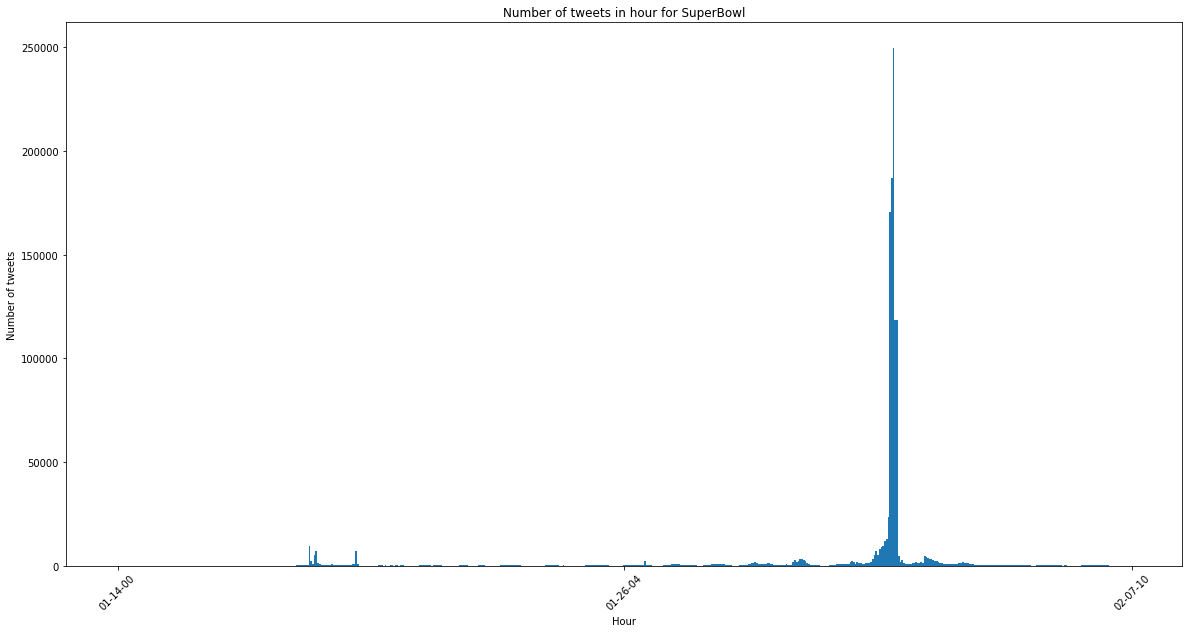

<Figure size 432x288 with 0 Axes>

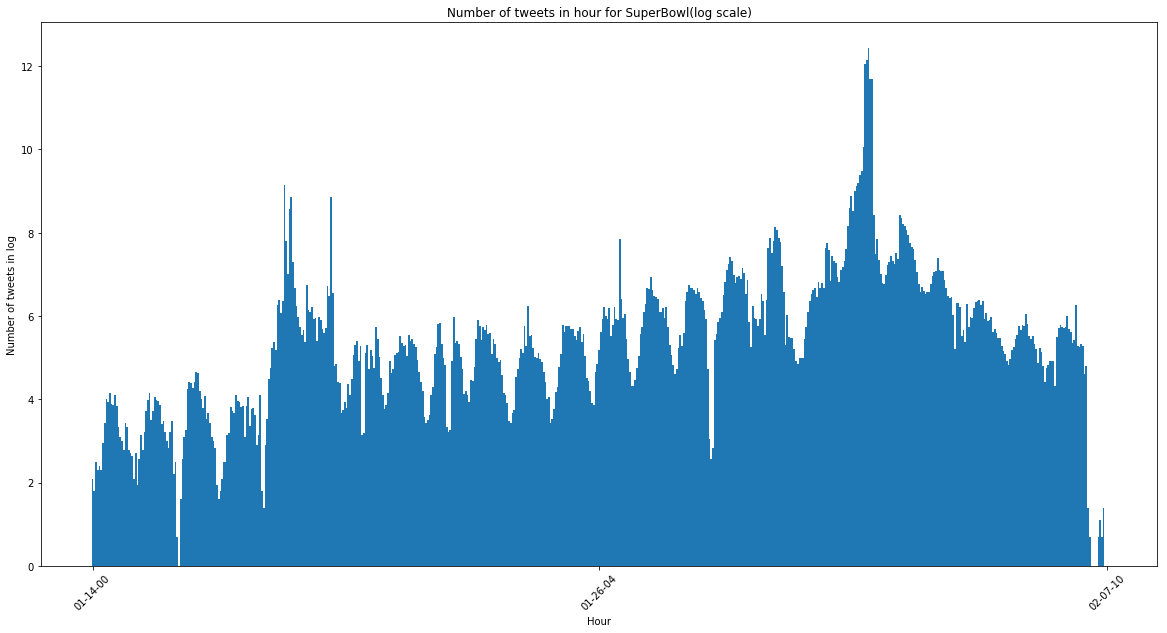

<Figure size 432x288 with 0 Axes>

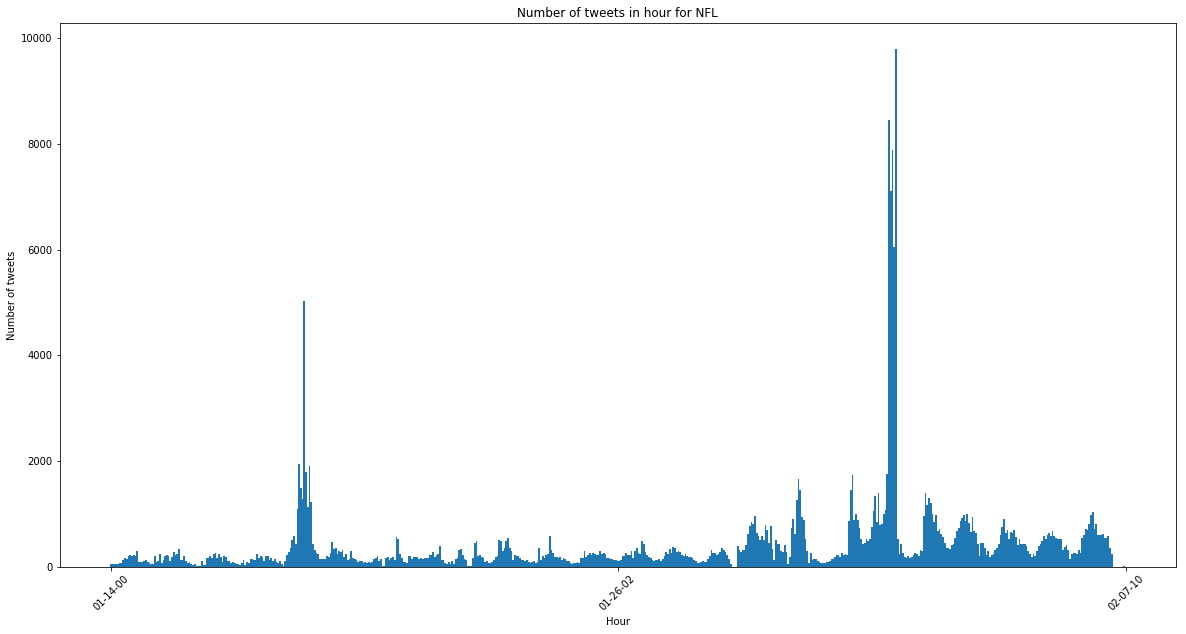

<Figure size 432x288 with 0 Axes>

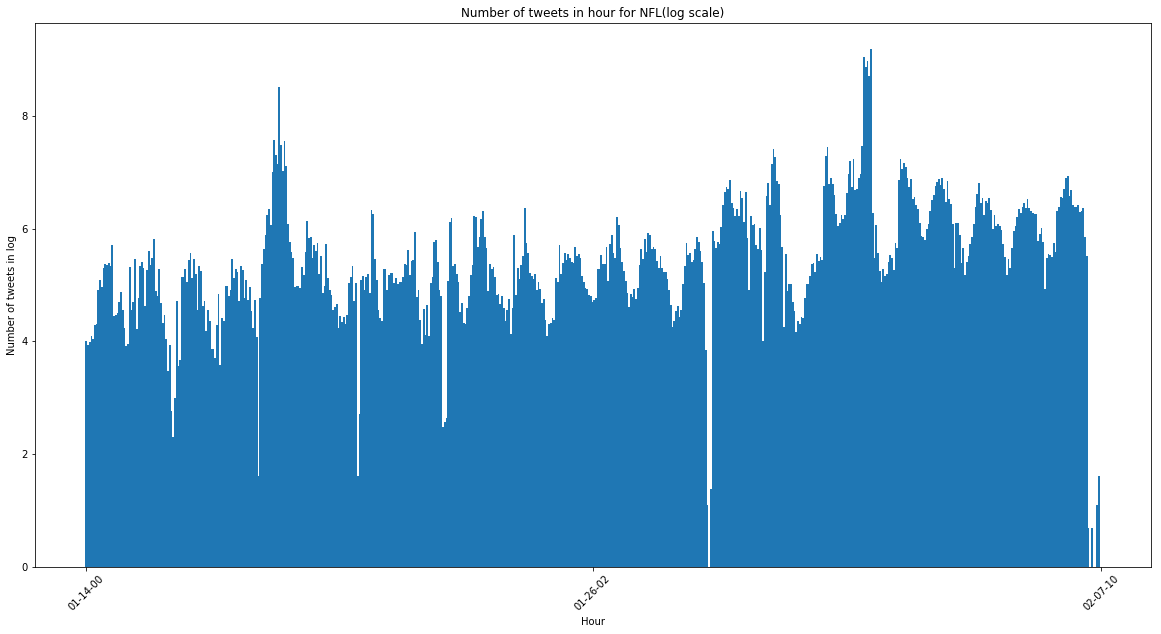

In [4]:
def plot_num_tweets_per_hour(file_name, hashtag_name):  
    # Store the number of tweets in each hour
    hour_list = []
    
    # load the json object list    
    f = open(file_name, 'r', encoding = 'utf-8')
    
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        post_time = eachTweet['citation_date']
        mdh = datetime.fromtimestamp(post_time, pst_tz).strftime("%m-%d-%H")
        hour_list.append(mdh)
        
        
    hour_list = np.unique(hour_list)
    # form a map, key: date, value: num of tweets
    hm_map = {i : 0 for i in hour_list}
        
    f = open(file_name, 'r', encoding = 'utf-8')

    for lineNum, line in enumerate(f) :
        eachTweet = json.loads(line)
        post_time = eachTweet['citation_date']
        mdh = datetime.fromtimestamp(post_time, pst_tz).strftime("%m-%d-%H")
        hm_map[mdh] = hm_map[mdh] + 1   
    
    # plot the figure
    plt.figure()
    plt.figure(figsize=(20,10))
    plt.bar(range(len(hour_list)), hm_map.values(), width=1)
    plt.xlabel('Hour')
    plt.ylabel('Number of tweets')
    plt.title(('Number of tweets in hour for ' + hashtag_name))
    plt.xticks([0,int(len(hour_list)/2),len(hour_list)],[hour_list[0],hour_list[int(len(hour_list)/2)-1],hour_list[len(hour_list)-1]])
    plt.xticks(rotation=45) 
    plt.show()
    
    logNum = []
    for i in hm_map.values() :
        logNum.append(np.log(i))
    
    plt.figure()
    plt.figure(figsize=(20,10))
    plt.bar(range(len(hour_list)), logNum, width=1)
    plt.xlabel('Hour')
    plt.ylabel('Number of tweets in log')
    plt.title(('Number of tweets in hour for ' + hashtag_name + '(log scale)'))
    plt.xticks([0,int(len(hour_list)/2),len(hour_list)],[hour_list[0],hour_list[int(len(hour_list)/2)-1],hour_list[len(hour_list)-1]])
    plt.xticks(rotation=45) 
    plt.show()


# Plot the two figures
plot_num_tweets_per_hour('tweets_#superbowl.txt', 'SuperBowl')
plot_num_tweets_per_hour('tweets_#nfl.txt', 'NFL')

# Question 3

In [15]:
def extract_five_features(file_name):
    
    f = open(file_name, 'r', encoding = 'utf-8')
    start_time, end_time = 2147483647, 0 
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        # use start time and end time to calculate of the number total hours
        start_time = min(eachTweet['citation_date'],start_time)  
        end_time = max(eachTweet['citation_date'],end_time)
    
    # use start time and end time to calculate of the number total hours
    num_hours = math.ceil((end_time - start_time)/3600)   # math,ceil(15.0)=15, math.ceil(15.2)=16
    
    # define a np.array to store feature values
    hourly_features = np.zeros([num_hours,5])
    
    # calculate the feature values in each hour
    f = open(file_name, 'r', encoding = 'utf-8')
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        hour_idx = int((eachTweet['citation_date'] - start_time)/3600)   # in which hour (in which index)
        hourly_features[hour_idx][0] += 1  # total number of tweets
        hourly_features[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
        hourly_features[hour_idx][2] += eachTweet['author']['followers']  # total number of followers
        if eachTweet['author']['followers'] > hourly_features[hour_idx][3]:
            hourly_features[hour_idx][3] = eachTweet['author']['followers']  # maximum followers
        tweet_time_UNIX = eachTweet['citation_date'] 
        tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
        hourly_features[hour_idx][4] = tweet_time.hour  # hour
        
    return hourly_features

file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for file_name in file_names:
    # X_train & y
    X = extract_five_features(file_name)
    X_train = X[:-1,:]  
    y = X[1:,0]
    # train a model
    RegressionModel = statsmodel.OLS(y, X_train).fit()
    y_pred = RegressionModel.predict(X_train)

    mse = metrics.mean_squared_error(y, y_pred)    
    rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
    
    # do the calculation
    print('*'*50)
    print('For ', file_name,':')
    
    print('MSE value: ',mse)
    print('RMSE value: ',rmse)
    print('R-squares measure : ', RegressionModel.rsquared)
    print('p values : ', RegressionModel.pvalues)
    print('t-test : ', RegressionModel.tvalues)
    print('Summary report: ')
    print(RegressionModel.summary())
    print('\n\n')

**************************************************
For  tweets_#gohawks.txt :
MSE value:  716101.690801841
RMSE value:  846.2279189449146
R-squares measure :  0.5289248105728146
p values :  [4.42086862e-20 1.04587450e-05 1.36692130e-04 3.22970250e-02
 2.81404313e-02]
t-test :  [ 9.5294923  -4.44705288 -3.8401074   2.14594155  2.20091074]
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     128.7
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           3.11e-91
Time:                        18:14:05   Log-Likelihood:                -4716.3
No. Observations:                 578   AIC:                             9443.
Df Residuals:                     573   BIC:                             9464.
Df Model:  

**************************************************
For  tweets_#sb49.txt :
MSE value:  13171504.39991799
RMSE value:  3629.256728300988
R-squares measure :  0.8416361286654217
p values :  [3.46364913e-34 2.62944491e-02 3.59785108e-01 1.13873506e-05
 2.34582314e-01]
t-test :  [13.02630523 -2.22756426  0.91650475  4.42783206 -1.18988154]
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     613.3
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          3.62e-228
Time:                        18:17:35   Log-Likelihood:                -5596.4
No. Observations:                 582   AIC:                         1.120e+04
Df Residuals:                     577   BIC:                         1.122e+04
Df Model:    

# Question 4

In [19]:
# All features we want to explore
feature_names = ['Number of tweets', 'Total number of retweets', 'Sum of the number of followers', 
                'Maximum number of followers', 'Time of the day', 'Total number of impressions',
                'Total number of momentum', 'Total number of favorite count', 'Total number of ranking score',
                'Total number of acceleration', 'Total number of replies', 'Total number of unique users',
                'Total number of unique authors', 'Total number of user mentions']

def extract_more_features(file_name):
    f = open(file_name, 'r', encoding = 'utf-8')
    start_time, end_time = 2147483647, 0 
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        # use start time and end time to calculate of the number total hours
        start_time = min(eachTweet['citation_date'],start_time)  
        end_time = max(eachTweet['citation_date'],end_time)
        
    num_hours = math.ceil((end_time - start_time)/3600)   # math.ceil(15.0)=15, math.ceil(15.2)=16
    # define a np.array to store feature values
    hourly_features = np.zeros([num_hours,14])
    
    # define lists to store unique users and authors
    unique_user_list = []
    unique_author_list = []
    
    f.close()
    
    f= open(file_name, 'r', encoding = 'utf-8')

    # calculate the feature values in each hour
    for tweet_string in f:
        tweet = json.loads(tweet_string)
        hour_idx = int((tweet['citation_date'] - start_time)/3600)                  
        hourly_features[hour_idx][0] += 1                                                  # total number of tweets
        hourly_features[hour_idx][1] += tweet['metrics']['citations']['total']             # total number of retweets
        hourly_features[hour_idx][2] += tweet['author']['followers']                       # total number of followers
        
        if tweet['author']['followers'] > hourly_features[hour_idx][3]:
            hourly_features[hour_idx][3] = tweet['author']['followers']                    # maximum followers
            
        tweet_time_UNIX = tweet['citation_date'] 
        tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
        hourly_features[hour_idx][4] = tweet_time.hour  # hour
        
        hourly_features[hour_idx][5] += tweet['metrics']['impressions']                    # total number of impression
        hourly_features[hour_idx][6] += tweet['metrics']['momentum']                       # total number of momentum 
        hourly_features[hour_idx][7] += tweet['tweet']['favorite_count']                   # total number of favorite count
        hourly_features[hour_idx][8] += tweet['metrics']['ranking_score']                  # total number of ranking score
        hourly_features[hour_idx][9] += tweet['metrics']['acceleration']                   # total number of acceleration
        hourly_features[hour_idx][10] += tweet['metrics']['citations']['replies']          # total number of replies  
        if tweet['tweet']['user']['id'] not in unique_user_list:
            unique_user_list.append(tweet['tweet']['user']['id'])                          # total number of unique users
            hourly_features[hour_idx][11] += 1
        if tweet['author']['name'] not in unique_author_list:
            unique_author_list.append(tweet['author']['name'])                             # total number of unique authors
            hourly_features[hour_idx][12] += 1
        hourly_features[hour_idx][13] += len(tweet['tweet']['entities']['user_mentions'])  # total number of user mentions
        
    return hourly_features


file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for file_name in file_names:
    # X_train & y
    X = extract_more_features(file_name)
    X_train = X[:-1,:]  
    y = X[1:,0]
    # train a model
    RegressionModel = statsmodel.OLS(y, X_train).fit()
    y_pred = RegressionModel.predict(X_train)

    mse = metrics.mean_squared_error(y, y_pred)    
    rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
    
    # do the calculation
    print('*'*50)
    print('For ', file_name,':')
    
    print('MSE value: ',mse)
    print('RMSE value: ',rmse)
    print('R-squares measure : ', RegressionModel.rsquared)
    print('p values : ', RegressionModel.pvalues)
    print('t-test : ', RegressionModel.tvalues)
    print('Summary report: ')
    print(RegressionModel.summary())
    print('\n\n')

**************************************************
For  tweets_#gohawks.txt :
MSE value:  414743.142968156
RMSE value:  644.0055457588514
R-squares measure :  0.7271683517202944
p values :  [4.32658730e-04 6.09384448e-05 1.34927098e-01 2.63677589e-01
 7.83523860e-03 1.73215741e-03 1.30150293e-16 2.57739273e-09
 2.55563154e-06 4.85694869e-01 9.24758854e-09 3.26926042e-02
 1.76026196e-01 1.01607789e-04]
t-test :  [-3.54031072 -4.03969286 -1.49709824 -1.11885666 -2.66863321  3.1477661
 -8.53490438  6.05414237  4.7522881   0.69763197  5.83166609 -2.14111638
  1.3547922   3.91464638]
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          9.37e-149
Ti

**************************************************
For  tweets_#patriots.txt :
MSE value:  3568809.458762839
RMSE value:  1889.1292858782426
R-squares measure :  0.7776489858517225
p values :  [1.73738836e-01 1.65083385e-02 9.24242568e-04 3.43381686e-09
 7.77782200e-01 9.16049970e-01 1.91389211e-03 3.35497701e-01
 1.65606833e-01 6.96285866e-01 5.80794184e-01 1.78965259e-04
 9.35407844e-05 5.41098419e-11]
t-test :  [-1.3619847  -2.40456943  3.33004486 -6.00342856  0.28234358 -0.10545724
 -3.11775862  0.96391134  1.38823198 -0.3905357   0.55254014 -3.77177149
  3.9347083   6.6874702 ]
Summary report: 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          3.26e-17

# Question 5

p values :  [4.32658730e-04 6.09384448e-05 1.34927098e-01 2.63677589e-01
 7.83523860e-03 1.73215741e-03 1.30150293e-16 2.57739273e-09
 2.55563154e-06 4.85694869e-01 9.24758854e-09 3.26926042e-02
 1.76026196e-01 1.01607789e-04]


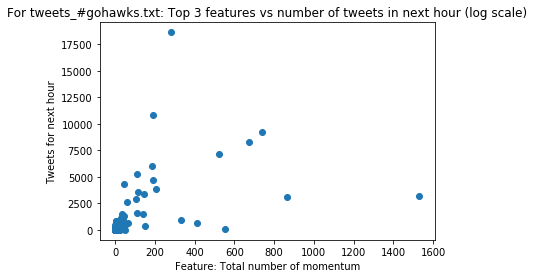

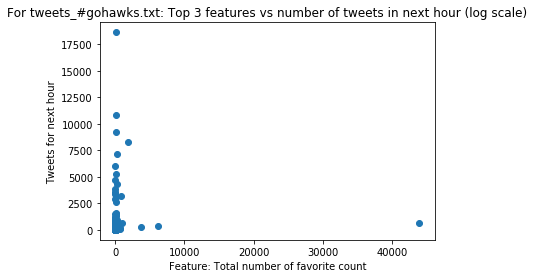

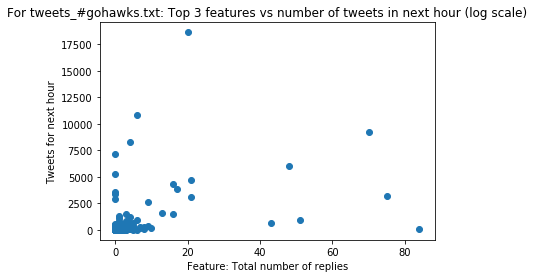

p values :  [5.77234745e-01 3.23316657e-13 2.10858207e-40 5.45714893e-20
 1.10254121e-01 9.85475249e-24 9.15501130e-01 7.21365262e-04
 7.49629580e-01 6.58658511e-01 9.24197599e-01 6.07378314e-19
 8.21335928e-20 5.10791411e-44]


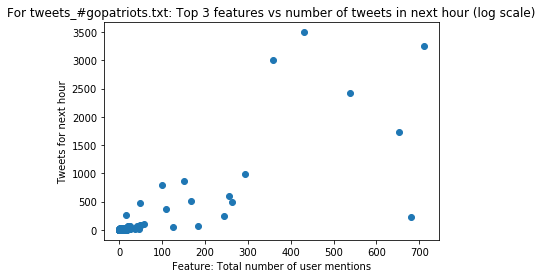

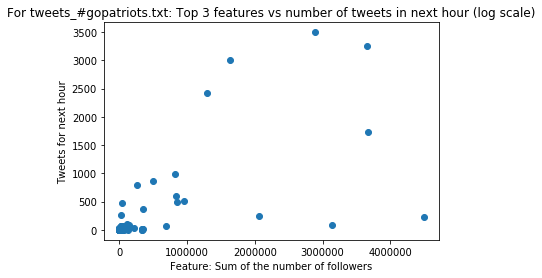

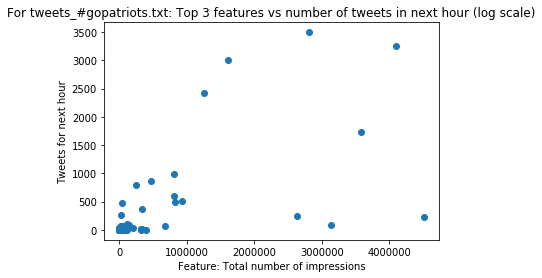

p values :  [3.01377080e-01 1.27090668e-02 2.33048083e-01 4.14838130e-03
 5.37258839e-01 1.23184554e-01 2.15657474e-01 4.64225986e-29
 7.73308910e-01 5.23172650e-01 1.23648251e-01 4.43465294e-02
 2.97779437e-02 6.97922515e-10]


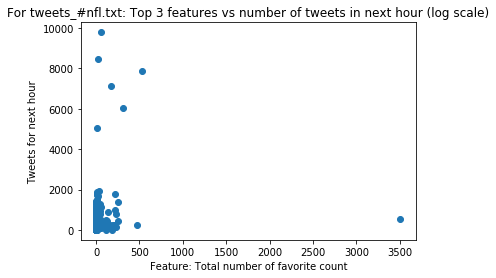

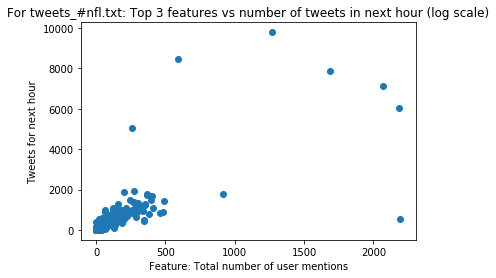

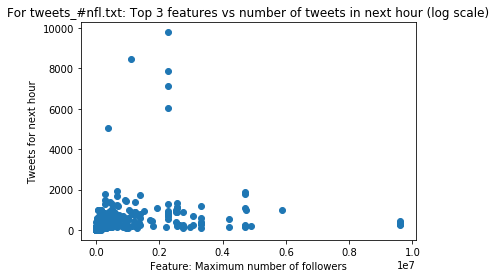

p values :  [1.73738836e-01 1.65083385e-02 9.24242568e-04 3.43381686e-09
 7.77782200e-01 9.16049970e-01 1.91389211e-03 3.35497701e-01
 1.65606833e-01 6.96285866e-01 5.80794184e-01 1.78965259e-04
 9.35407844e-05 5.41098419e-11]


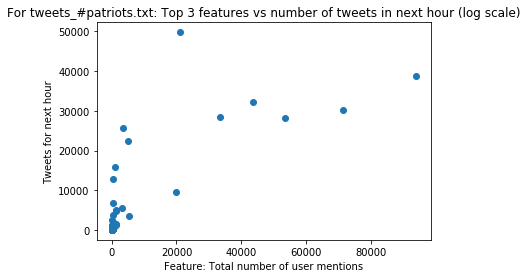

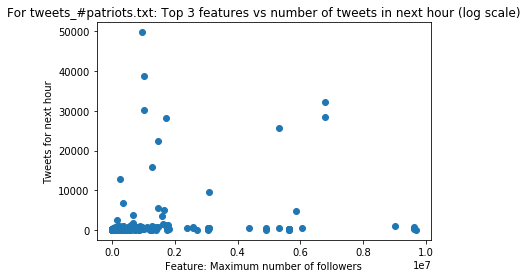

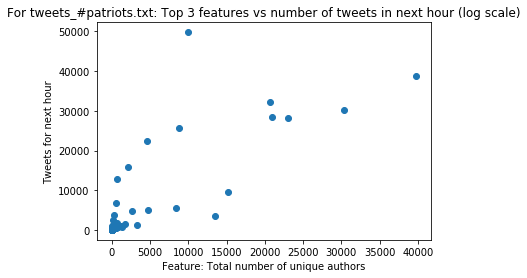

p values :  [1.63125863e-02 2.16129022e-01 1.63012674e-05 9.35502386e-04
 2.45265048e-01 4.16080948e-02 7.05345538e-03 4.46572739e-03
 1.47996269e-01 3.85667066e-04 2.91569431e-13 1.61150471e-12
 4.34859664e-46 6.78630862e-02]


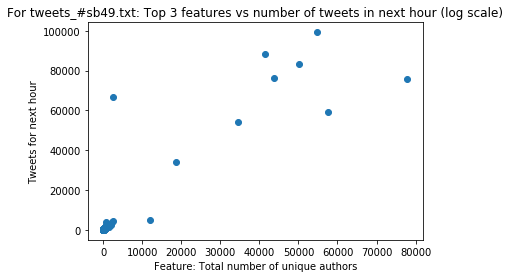

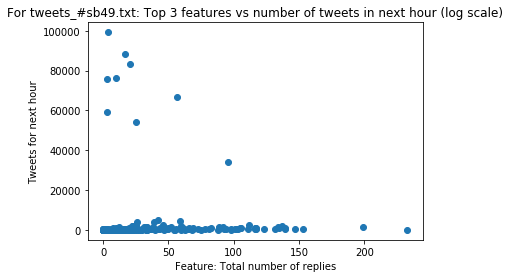

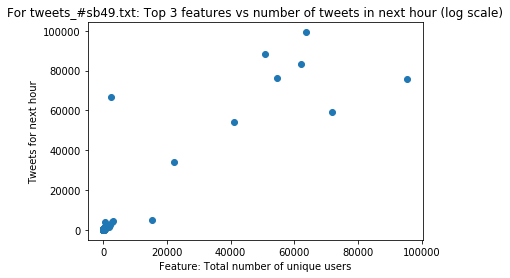

p values :  [1.08823835e-04 1.59193948e-26 1.49322937e-03 4.42400693e-02
 6.49641228e-01 1.31890629e-01 1.52971535e-19 3.29515873e-13
 1.99682465e-02 5.90614579e-18 3.44271086e-02 5.81459719e-06
 1.35386323e-03 1.10551978e-01]


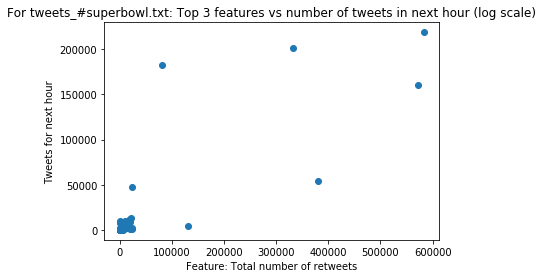

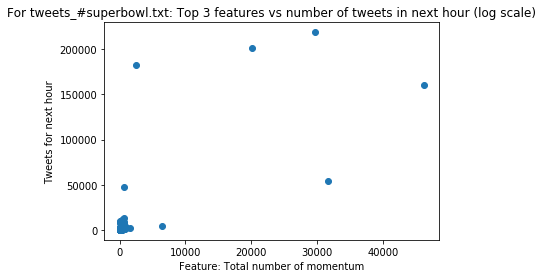

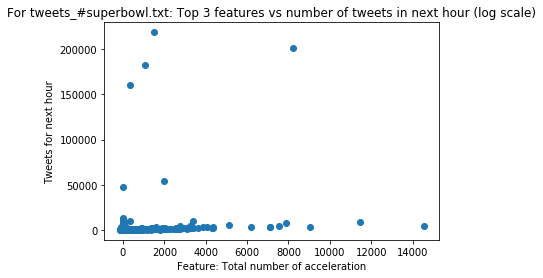

In [109]:
# All features we want to explore
feature_names = ['Number of tweets', 'Total number of retweets', 'Sum of the number of followers', 
                'Maximum number of followers', 'Time of the day', 'Total number of impressions',
                'Total number of momentum', 'Total number of favorite count', 'Total number of ranking score',
                'Total number of acceleration', 'Total number of replies', 'Total number of unique users',
                'Total number of unique authors', 'Total number of user mentions']

file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for file_name in file_names:
    # X_train & y
    X = extract_more_features(file_name)
    X_train = X[:-1,:]  
    y = X[1:,0]
    # train a model
    RegressionModel = statsmodel.OLS(y, X_train).fit()
    y_pred = RegressionModel.predict(X_train)
    # Get p values
    print('p values : ', RegressionModel.pvalues)
    top3_index = []
    pval = RegressionModel.pvalues.tolist()
    index1 = pval.index(min(pval))
    pval[pval.index(min(pval))] = 1
    index2 = pval.index(min(pval))
    pval[pval.index(min(pval))] = 1
    index3 = pval.index(min(pval))
    
    plt.figure()
    plt.scatter(X_train[:,index1], y)
    plt.xlabel('Feature: ' + feature_names[index1])
    plt.ylabel('Tweets for next hour')
    plt.title(('For ' + file_name + ': Top 3 features vs number of tweets in next hour (log scale)'))
    plt.show()

    plt.figure()
    plt.scatter(X_train[:,index2], y)
    plt.xlabel('Feature: ' + feature_names[index2])
    plt.ylabel('Tweets for next hour')
    plt.title(('For ' + file_name + ': Top 3 features vs number of tweets in next hour (log scale)'))
    plt.show()

    plt.figure()
    plt.scatter(X_train[:,index3], y)
    plt.xlabel('Feature: ' + feature_names[index3])
    plt.ylabel('Tweets for next hour')
    plt.title(('For ' + file_name + ': Top 3 features vs number of tweets in next hour (log scale)'))
    plt.show()
    

# Question 6

In [111]:
def three_window_analysis(file_name):
    
    f = open(file_name, 'r', encoding = 'utf-8')
    start_time, end_time = 2147483647, 0
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        # use start time and end time to calculate of the number total hours
        start_time = min(eachTweet['citation_date'],start_time)  
        end_time = max(eachTweet['citation_date'],end_time)
    
    # Define two break points in time domain
    feb18am = time.mktime(datetime(year=2015,month=2,day=1,hour=8,tzinfo=pst_tz).timetuple()) 
    feb18pm = time.mktime(datetime(year=2015,month=2,day=1,hour=20,tzinfo=pst_tz).timetuple())
    
    period1_hour = math.ceil((feb18am - start_time)/3600)     # before Feb. 1, 8：00 am
    period2_5min = math.ceil((feb18pm - feb18am)/300)         # between Feb. 1, 8:00 am and Feb. 1, 8:00 pm
    period3_hour = math.ceil((end_time - feb18pm)/3600)       # after Feb. 1, 8:00 pm
    
    # define a np.array to store feature values
    hourly_features_1 = np.zeros([period1_hour,5])
    fivemin_features = np.zeros([period2_5min,5])
    hourly_features_2 = np.zeros([period3_hour,5])
    
    f = open(file_name, 'r', encoding = 'utf-8')
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        if (eachTweet['citation_date'] <= feb18am) :
            hour_idx = int((eachTweet['citation_date'] - start_time)/3600)                # in which hour (in which index)
            hourly_features_1[hour_idx][0] += 1                                           # total number of tweets
            hourly_features_1[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
            hourly_features_1[hour_idx][2] += eachTweet['author']['followers']            # total number of followers
            if eachTweet['author']['followers'] > hourly_features_1[hour_idx][3]:
                hourly_features_1[hour_idx][3] = eachTweet['author']['followers']         # maximum followers
            tweet_time_UNIX = eachTweet['citation_date'] 
            tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
            hourly_features_1[hour_idx][4] = tweet_time.hour  # hour
        elif (eachTweet['citation_date'] > feb18am and eachTweet['citation_date'] < feb18pm) :
            fivemin_idx = int((eachTweet['citation_date'] - feb18am)/300)                   # in which hour (in which index)
            fivemin_features[fivemin_idx][0] += 1                                           # total number of tweets
            fivemin_features[fivemin_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
            fivemin_features[fivemin_idx][2] += eachTweet['author']['followers']            # total number of followers
            if eachTweet['author']['followers'] > fivemin_features[fivemin_idx][3]:
                fivemin_features[fivemin_idx][3] = eachTweet['author']['followers']         # maximum followers
            tweet_time_UNIX = eachTweet['citation_date'] 
            tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
            fivemin_features[fivemin_idx][4] = tweet_time.hour 
        else :
            hour_idx = int((eachTweet['citation_date'] - feb18pm)/3600)                   # in which hour (in which index)
            hourly_features_2[hour_idx][0] += 1                                           # total number of tweets
            hourly_features_2[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
            hourly_features_2[hour_idx][2] += eachTweet['author']['followers']            # total number of followers
            if eachTweet['author']['followers'] > hourly_features_2[hour_idx][3]:
                hourly_features_2[hour_idx][3] = eachTweet['author']['followers']         # maximum followers
            tweet_time_UNIX = eachTweet['citation_date'] 
            tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
            hourly_features_2[hour_idx][4] = tweet_time.hour 
    
    #------------------------------------------------------------------------------------------------------------
    # 5 fold cross validation
    kf = KFold(n_splits=5, shuffle=False, random_state=None)
    p1_train = hourly_features_1[:-1,:]
    p1_y = hourly_features_1[1:,0]
    mse_test, r_squared = [],[]
    for trainIndex, testIndex in kf.split(p1_train) :
        x_train,x_test = p1_train[trainIndex], p1_train[testIndex]
        y_train, y_test = p1_y[trainIndex], p1_y[testIndex]
        RegressionModel = statsmodel.OLS(y_train, x_train).fit()
        mse_test.append(metrics.mean_squared_error(y_test,RegressionModel.predict(x_test)))
        r_squared.append(RegressionModel.rsquared)
    
    print('-'*50)
    print('Before 2/1/8:00 AM')
    print('MSE value: ')
    print(mse_test)
    print('The averaged MSE is ', np.mean(mse_test))
    print('RMSE value: ')
    print(np.sqrt(mse_test))
    print('The averaged RMSE is ', np.mean(np.sqrt(mse_test)))
    print('R-squares measure : ')
    print(r_squared)
    print('The averaged R squared score is ', np.mean(r_squared))    
    print('-'*50)
    
    #------------------------------------------------------------------------------------------------------------
    # 5 fold cross validation
    kf = KFold(n_splits=5, shuffle=False, random_state=None)
    p2_train = fivemin_features[:-1,:]
    p2_y = fivemin_features[1:,0]
    mse_test, r_squared = [],[]
    for trainIndex, testIndex in kf.split(p2_train) :
        x_train,x_test = p2_train[trainIndex], p2_train[testIndex]
        y_train, y_test = p2_y[trainIndex], p2_y[testIndex]
        RegressionModel = statsmodel.OLS(y_train, x_train).fit()
        mse_test.append(metrics.mean_squared_error(y_test,RegressionModel.predict(x_test)))
        r_squared.append(RegressionModel.rsquared)
    
    print('Between 2/1/8:00 AM and 2/1/8:00 PM')
    print('MSE value: ')
    print(mse_test)
    print('The averaged MSE is ', np.mean(mse_test))
    print('RMSE value: ')
    print(np.sqrt(mse_test))
    print('The averaged RMSE is ', np.mean(np.sqrt(mse_test)))
    print('R-squares measure : ')
    print(r_squared)
    print('The averaged R squared score is ', np.mean(r_squared))    
    
    #------------------------------------------------------------------------------------------------------------
    # 5 fold cross validation
    kf = KFold(n_splits=5, shuffle=False, random_state=None)
    p3_train = hourly_features_2[:-1,:]
    p3_y = hourly_features_2[1:,0]
    mse_test, r_squared = [],[]
    for trainIndex, testIndex in kf.split(p3_train) :
        x_train,x_test = p3_train[trainIndex], p3_train[testIndex]
        y_train, y_test = p3_y[trainIndex], p3_y[testIndex]
        RegressionModel = statsmodel.OLS(y_train, x_train).fit()
        mse_test.append(metrics.mean_squared_error(y_test,RegressionModel.predict(x_test)))
        r_squared.append(RegressionModel.rsquared)
    
    print('-'*50)
    print('After 2/1/8:00 PM')
    print('MSE value: ')
    print(mse_test)
    print('The averaged MSE is ', np.mean(mse_test))
    print('RMSE value: ')
    print(np.sqrt(mse_test))
    print('The averaged RMSE is ', np.mean(np.sqrt(mse_test)))
    print('R-squares measure : ')
    print(r_squared)
    print('The averaged R squared score is ', np.mean(r_squared))    
    print('-'*50)

file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for file_name in file_names:
    print('For ', file_name, ': ')
    three_window_analysis(file_name) 
    print('\n\n')

For  tweets_#gohawks.txt : 
--------------------------------------------------
Before 2/1/8:00 AM
MSE value: 
[144303.74463582344, 4690037.138965078, 41098.635658441184, 90244.6586786241, 65652.98104374265]
The averaged MSE is  1006267.4317963418
RMSE value: 
[ 379.87332709 2165.64935734  202.7279844   300.40748772  256.22837673]
The averaged RMSE is  660.9773066579037
R-squares measure : 
[0.3819842874904992, 0.8766435509722328, 0.3708362117284255, 0.3749793472583487, 0.37440919886514]
The averaged R squared score is  0.47577051926292924
--------------------------------------------------
Between 2/1/8:00 AM and 2/1/8:00 PM
MSE value: 
[8502.278673082954, 2447.4481481853213, 13113.580274067395, 251031.54694599405, 149837.058997865]
The averaged MSE is  84986.38260783894
RMSE value: 
[ 92.20780158  49.47169037 114.51454176 501.03048505 387.08792153]
The averaged RMSE is  228.86248805900595
R-squares measure : 
[0.7626346665659082, 0.7501808587391013, 0.7279135923034242, 0.79875813075549

--------------------------------------------------
Before 2/1/8:00 AM
MSE value: 
[18406.049412916724, 3675493.846588369, 13726.347555964696, 64664.867244005894, 548815.2861451671]
The averaged MSE is  864221.2793892848
RMSE value: 
[ 135.66889626 1917.15775214  117.15949623  254.2928769   740.8206842 ]
The averaged RMSE is  633.0199411471447
R-squares measure : 
[0.4557383809135984, 0.8772204140328325, 0.4520562939419154, 0.44100343837329825, 0.20583188944909492]
The averaged R squared score is  0.48637008334214793
--------------------------------------------------
Between 2/1/8:00 AM and 2/1/8:00 PM
MSE value: 
[150588.04922337618, 122927.45704572462, 2106583.2233467116, 106342500.36885098, 14598395.183906507]
The averaged MSE is  24664198.85647466
RMSE value: 
[  388.05676031   350.61012114  1451.4073251  10312.25001485
  3820.78462935]
The averaged RMSE is  3264.6217701512733
R-squares measure : 
[0.934218806245097, 0.9341089869670873, 0.9352774568206613, 0.9312392165719237, 0.9447

# Question 7

In [112]:
def three_window_analysis_aggregate(file_list):
    start_time, end_time = 2147483647, 0
    
    for i in file_list :
        f = open(i, 'r', encoding = 'utf-8')
        for lineNum, line in enumerate(f) : 
            eachTweet = json.loads(line)
            start_time = min(eachTweet['citation_date'],start_time)  
            end_time = max(eachTweet['citation_date'],end_time)
        f.close()
    
    # Define two break points in time domain
    feb18am = time.mktime(datetime(year=2015,month=2,day=1,hour=8,tzinfo=pst_tz).timetuple()) 
    feb18pm = time.mktime(datetime(year=2015,month=2,day=1,hour=20,tzinfo=pst_tz).timetuple())
    
    period1_hour = math.ceil((feb18am - start_time)/3600)   # before Feb. 1, 8：00 am
    period2_5min = math.ceil((feb18pm - feb18am)/300)   # between Feb. 1, 8:00 am and Feb. 1, 8:00 pm
    period3_hour = math.ceil((end_time - feb18pm)/3600)     # after Feb. 1, 8:00 pm
    
    # define a np.array to store feature values
    hourly_features_1 = np.zeros([period1_hour,5])
    fivemin_features = np.zeros([period2_5min,5])
    hourly_features_2 = np.zeros([period3_hour,5])
    
    for i in file_list :
        f = open(i, 'r', encoding = 'utf-8')
        for lineNum, line in enumerate(f) : 
            eachTweet = json.loads(line)
            if (eachTweet['citation_date'] <= feb18am) :
                hour_idx = int((eachTweet['citation_date'] - start_time)/3600)                # in which hour (in which index)
                hourly_features_1[hour_idx][0] += 1                                           # total number of tweets
                hourly_features_1[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
                hourly_features_1[hour_idx][2] += eachTweet['author']['followers']            # total number of followers
                if eachTweet['author']['followers'] > hourly_features_1[hour_idx][3]:
                    hourly_features_1[hour_idx][3] = eachTweet['author']['followers']         # maximum followers
                tweet_time_UNIX = eachTweet['citation_date'] 
                tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
                hourly_features_1[hour_idx][4] = tweet_time.hour  # hour
            elif (eachTweet['citation_date'] > feb18am and eachTweet['citation_date'] < feb18pm) :
                fivemin_idx = int((eachTweet['citation_date'] - feb18am)/300)                   # in which hour (in which index)
                fivemin_features[fivemin_idx][0] += 1                                           # total number of tweets
                fivemin_features[fivemin_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
                fivemin_features[fivemin_idx][2] += eachTweet['author']['followers']            # total number of followers
                if eachTweet['author']['followers'] > fivemin_features[fivemin_idx][3]:
                    fivemin_features[fivemin_idx][3] = eachTweet['author']['followers']         # maximum followers
                tweet_time_UNIX = eachTweet['citation_date'] 
                tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
                fivemin_features[fivemin_idx][4] = tweet_time.hour 
            else :
                hour_idx = int((eachTweet['citation_date'] - feb18pm)/3600)                   # in which hour (in which index)
                hourly_features_2[hour_idx][0] += 1                                           # total number of tweets
                hourly_features_2[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
                hourly_features_2[hour_idx][2] += eachTweet['author']['followers']            # total number of followers
                if eachTweet['author']['followers'] > hourly_features_2[hour_idx][3]:
                    hourly_features_2[hour_idx][3] = eachTweet['author']['followers']         # maximum followers
                tweet_time_UNIX = eachTweet['citation_date'] 
                tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
                hourly_features_2[hour_idx][4] = tweet_time.hour 
        f.close()
            
    #------------------------------------------------------------------------------------------------------------
    # 5 fold cross validation
    kf = KFold(n_splits=5, shuffle=False, random_state=None)
    p1_train = hourly_features_1[:-1,:]
    p1_y = hourly_features_1[1:,0]
    mse_test, r_squared = [],[]
    for trainIndex, testIndex in kf.split(p1_train) :
        x_train,x_test = p1_train[trainIndex], p1_train[testIndex]
        y_train, y_test = p1_y[trainIndex], p1_y[testIndex]
        RegressionModel = statsmodel.OLS(y_train, x_train).fit()
        mse_test.append(metrics.mean_squared_error(y_test,RegressionModel.predict(x_test)))
        r_squared.append(RegressionModel.rsquared)
    
    print('-'*50)
    print('Before 2/1/8:00 AM')
    print('MSE value: ')
    print(mse_test)
    print('RMSE value: ')
    print(np.sqrt(mse_test))
    print('R-squares measure : ')
    print(r_squared)
    print('-'*50)
    
    #------------------------------------------------------------------------------------------------------------
    # 5 fold cross validation
    kf = KFold(n_splits=5, shuffle=False, random_state=None)
    p2_train = fivemin_features[:-1,:]
    p2_y = fivemin_features[1:,0]
    mse_test, r_squared = [],[]
    for trainIndex, testIndex in kf.split(p2_train) :
        x_train,x_test = p2_train[trainIndex], p2_train[testIndex]
        y_train, y_test = p2_y[trainIndex], p2_y[testIndex]
        RegressionModel = statsmodel.OLS(y_train, x_train).fit()
        mse_test.append(metrics.mean_squared_error(y_test,RegressionModel.predict(x_test)))
        r_squared.append(RegressionModel.rsquared)
    
    print('Between 2/1/8:00 AM and 2/1/8:00 PM')
    print('MSE value: ')
    print(mse_test)
    print('RMSE value: ')
    print(np.sqrt(mse_test))
    print('R-squares measure : ')
    print(r_squared)
    
    #------------------------------------------------------------------------------------------------------------
    # 5 fold cross validation
    kf = KFold(n_splits=5, shuffle=False, random_state=None)
    p3_train = hourly_features_2[:-1,:]
    p3_y = hourly_features_2[1:,0]
    mse_test, r_squared = [],[]
    for trainIndex, testIndex in kf.split(p3_train) :
        x_train,x_test = p3_train[trainIndex], p3_train[testIndex]
        y_train, y_test = p3_y[trainIndex], p3_y[testIndex]
        RegressionModel = statsmodel.OLS(y_train, x_train).fit()
        mse_test.append(metrics.mean_squared_error(y_test,RegressionModel.predict(x_test)))
        r_squared.append(RegressionModel.rsquared)
    
    print('-'*50)
    print('After 2/1/8:00 PM')
    print('MSE value: ')
    print(mse_test)
    print('RMSE value: ')
    print(np.sqrt(mse_test))
    print('R-squares measure : ')
    print(r_squared)
    print('-'*50)

file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

three_window_analysis_aggregate(file_names) 
print('\n\n')

--------------------------------------------------
Before 2/1/8:00 AM
MSE value: 
[77626.81742996241, 24649401.767284825, 400403.181472969, 273813.96179227263, 1923999.2937701605]
RMSE value: 
[ 278.61589587 4964.81638807  632.7741947   523.27235909 1387.08301618]
R-squares measure : 
[0.5213044851509878, 0.8673959688717439, 0.5197952693755041, 0.5115707417964793, 0.4566561147320868]
--------------------------------------------------
Between 2/1/8:00 AM and 2/1/8:00 PM
MSE value: 
[1271086.5831547359, 3694051.073615238, 8767403.572224522, 146004391.4412959, 41471428.56646122]
RMSE value: 
[ 1127.4247572   1921.99143432  2960.98017086 12083.22769136
  6439.83140823]
R-squares measure : 
[0.9432400537033205, 0.9393310194045745, 0.940795226898573, 0.9352140722751552, 0.9591922217958702]
--------------------------------------------------
After 2/1/8:00 PM
MSE value: 
[6331680.736939232, 480149.3244772458, 95836.47505529846, 85592.55212425745, 39885.73304315123]
RMSE value: 
[2516.28311939 

# Question 8

In [80]:
def get_aggregated_data(file_list):
    start_time, end_time = 2147483647, 0
    for i in file_list :
        f = open(i, 'r', encoding = 'utf-8')
        for lineNum, line in enumerate(f) : 
            eachTweet = json.loads(line)
            start_time = min(eachTweet['citation_date'],start_time)  
            end_time = max(eachTweet['citation_date'],end_time)
        f.close()
    
    num_hours = math.ceil((end_time - start_time)/3600)   # before Feb. 1, 8：00 am
    
    # define a np.array to store feature values
    hourly_features = np.zeros([num_hours,5])
    
    for i in file_list :
        f = open(i, 'r', encoding = 'utf-8')
        for lineNum, line in enumerate(f) : 
            eachTweet = json.loads(line)
            hour_idx = int((eachTweet['citation_date'] - start_time)/3600)              # in which hour (in which index)
            hourly_features[hour_idx][0] += 1                                           # total number of tweets
            hourly_features[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
            hourly_features[hour_idx][2] += eachTweet['author']['followers']            # total number of followers
            if eachTweet['author']['followers'] > hourly_features[hour_idx][3]:
                hourly_features[hour_idx][3] = eachTweet['author']['followers']         # maximum followers
            tweet_time_UNIX = eachTweet['citation_date'] 
            tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
            hourly_features[hour_idx][4] = tweet_time.hour 
        f.close()
    
    return hourly_features

file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
hourly_features = get_aggregated_data(file_names)
print('extraction done!')

extraction done!


In [127]:
X = hourly_features[:-1,:]
y = hourly_features[1:,0]

param_grid = [{
        'max_depth': [10,20,40,60,80,100,200,None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1,2,4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }]

gridR = GridSearchCV(RandomForestRegressor(), cv=5, n_jobs=2, param_grid=param_grid, scoring='neg_mean_squared_error')
gridR.fit(X, y)
best_param = gridR.best_params_ 
best_score = gridR.best_score_ 
print('For Random Forest Regressor, the best parameters is ', best_param)
print('For Random Forest Regressor, the best score is ', best_score)


gridR = GridSearchCV(GradientBoostingRegressor(), cv=5, n_jobs=-1, param_grid=param_grid, scoring='neg_mean_squared_error')
gridR.fit(X, y)
best_param = gridR.best_params_ 
best_score = gridR.best_score_ 
print('For Gradient Boosting Regressor, the best parameters is ', best_param)
print('For Gradient Boosting Regressor, the best score is ', best_score)
print('Finished!')

C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


For Random Forest Regressor, the best parameters is  {'max_depth': 80, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
For Random Forest Regressor, the best score is  -727342234.5816495


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


For Gradient Boosting Regressor, the best parameters is  {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
For Gradient Boosting Regressor, the best score is  -730529094.1875309
Finished!


In [130]:
X = hourly_features[:-1,:]
y = hourly_features[1:,0]

# For Random Forest Regressor
best_randForest = RandomForestRegressor(n_estimators=200, max_depth=80, max_features='auto', 
                                        min_samples_leaf=1,min_samples_split = 5, random_state=None)

scores = cross_validate(best_randForest, X, y, scoring=['neg_mean_squared_error'], cv=5, return_train_score=True)
print(np.abs(scores['test_neg_mean_squared_error']))

print('\n')
      
# Gradient Boosting Regressor
best_gradientBoost = GradientBoostingRegressor(n_estimators=600, max_depth=40, max_features='sqrt', 
                                        min_samples_leaf=1,min_samples_split = 2, random_state=None)

scores = cross_validate(best_gradientBoost, X, y, scoring=['neg_mean_squared_error'], cv=5, return_train_score=True)
print(np.abs(scores['test_neg_mean_squared_error']))

[8.70999860e+07 3.21260327e+06 5.12524627e+05 3.59178473e+09
 3.94235362e+05]


[1.11333409e+08 2.16388214e+06 4.75959032e+05 3.62032833e+09
 5.67791941e+05]


# Question 9

In [131]:
X = hourly_features[:-1,:]
y = hourly_features[1:,0]

# For Random Forest Regressor
best_randForest = RandomForestRegressor(n_estimators=200, max_depth=80, max_features='auto', 
                                        min_samples_leaf=1,min_samples_split = 5, random_state=None)
best_randForest.fit(X,y)
y_pred = best_randForest.predict(X)

mse = metrics.mean_squared_error(y, y_pred)    
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))

print("For Random Forest Regressor, the MSE is ", mse)
print("For Random Forest Regressor, the RMSE is ", rmse)

# Gradient Boosting Regressor
best_gradientBoost = GradientBoostingRegressor(n_estimators=600, max_depth=40, max_features='sqrt', 
                                        min_samples_leaf=1,min_samples_split = 2, random_state=None)

best_gradientBoost.fit(X,y)
y_pred = best_gradientBoost.predict(X)

mse = metrics.mean_squared_error(y, y_pred)    
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))

print("For Gradient Boosting Regressor, the MSE is ", mse)
print("For Gradient Boosting Regressor, the RMSE is ", rmse)

# OSL model
RegressionModel = statsmodel.OLS(y, X).fit()
y_pred = RegressionModel.predict(X)

mse = metrics.mean_squared_error(y, y_pred)    
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))

print("For OSL, the MSE is ", mse)
print("For OSL, the RMSE is ", rmse)

For Random Forest Regressor, the MSE is  75025513.43006879
For Random Forest Regressor, the RMSE is  8661.726931164985
For Gradient Boosting Regressor, the MSE is  9.981442484561757e-08
For Gradient Boosting Regressor, the RMSE is  0.00031593420967919504
For OSL, the MSE is  140986465.22654238
For OSL, the RMSE is  11873.77215658707


# Question 10

In [123]:
def get_three_window_analysis_aggregate(file_list):
    start_time, end_time = 2147483647, 0
    
    for i in file_list :
        f = open(i, 'r', encoding = 'utf-8')
        for lineNum, line in enumerate(f) : 
            eachTweet = json.loads(line)
            start_time = min(eachTweet['citation_date'],start_time)  
            end_time = max(eachTweet['citation_date'],end_time)
        f.close()
    
    # Define two break points in time domain
    feb18am = time.mktime(datetime(year=2015,month=2,day=1,hour=8,tzinfo=pst_tz).timetuple()) 
    feb18pm = time.mktime(datetime(year=2015,month=2,day=1,hour=20,tzinfo=pst_tz).timetuple())
    
    period1_hour = math.ceil((feb18am - start_time)/3600)   # before Feb. 1, 8：00 am
    period2_5min = math.ceil((feb18pm - feb18am)/300)   # between Feb. 1, 8:00 am and Feb. 1, 8:00 pm
    period3_hour = math.ceil((end_time - feb18pm)/3600)     # after Feb. 1, 8:00 pm
    
    # define a np.array to store feature values
    hourly_features_1 = np.zeros([period1_hour,5])
    fivemin_features = np.zeros([period2_5min,5])
    hourly_features_2 = np.zeros([period3_hour,5])
    
    for i in file_list :
        f = open(i, 'r', encoding = 'utf-8')
        for lineNum, line in enumerate(f) : 
            eachTweet = json.loads(line)
            if (eachTweet['citation_date'] <= feb18am) :
                hour_idx = int((eachTweet['citation_date'] - start_time)/3600)                # in which hour (in which index)
                hourly_features_1[hour_idx][0] += 1                                           # total number of tweets
                hourly_features_1[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
                hourly_features_1[hour_idx][2] += eachTweet['author']['followers']            # total number of followers
                if eachTweet['author']['followers'] > hourly_features_1[hour_idx][3]:
                    hourly_features_1[hour_idx][3] = eachTweet['author']['followers']         # maximum followers
                tweet_time_UNIX = eachTweet['citation_date'] 
                tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
                hourly_features_1[hour_idx][4] = tweet_time.hour  # hour
            elif (eachTweet['citation_date'] > feb18am and eachTweet['citation_date'] < feb18pm) :
                fivemin_idx = int((eachTweet['citation_date'] - feb18am)/300)                   # in which hour (in which index)
                fivemin_features[fivemin_idx][0] += 1                                           # total number of tweets
                fivemin_features[fivemin_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
                fivemin_features[fivemin_idx][2] += eachTweet['author']['followers']            # total number of followers
                if eachTweet['author']['followers'] > fivemin_features[fivemin_idx][3]:
                    fivemin_features[fivemin_idx][3] = eachTweet['author']['followers']         # maximum followers
                tweet_time_UNIX = eachTweet['citation_date'] 
                tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
                fivemin_features[fivemin_idx][4] = tweet_time.hour 
            else :
                hour_idx = int((eachTweet['citation_date'] - feb18pm)/3600)                   # in which hour (in which index)
                hourly_features_2[hour_idx][0] += 1                                           # total number of tweets
                hourly_features_2[hour_idx][1] += eachTweet['metrics']['citations']['total']  # total number of retweets
                hourly_features_2[hour_idx][2] += eachTweet['author']['followers']            # total number of followers
                if eachTweet['author']['followers'] > hourly_features_2[hour_idx][3]:
                    hourly_features_2[hour_idx][3] = eachTweet['author']['followers']         # maximum followers
                tweet_time_UNIX = eachTweet['citation_date'] 
                tweet_time = datetime.fromtimestamp(tweet_time_UNIX,pst_tz) 
                hourly_features_2[hour_idx][4] = tweet_time.hour 
        f.close()
            
    return hourly_features_1, fivemin_features, hourly_features_2

file_names = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
              'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']
hourly_features_1, fivemin_features, hourly_features_2 = get_three_window_analysis_aggregate(file_names)
print('extraction done!')

extraction done!


In [126]:
X1 = hourly_features_1[:-1,:]
y1 = hourly_features_1[1:,0]
X2 = fivemin_features[:-1,:]
y2 = fivemin_features[1:,0]
X3 = hourly_features_2[:-1,:]
y3 = hourly_features_2[1:,0]

param_grid = [{
        'max_depth': [10,20,40,60,80,100,200,None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1,2,4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }]

gridR = GridSearchCV(GradientBoostingRegressor(), cv=5, n_jobs=-1, param_grid=param_grid, scoring='neg_mean_squared_error')
gridR.fit(X1, y1)
best_param = gridR.best_params_ 
best_score = gridR.best_score_ 
print('For period 1, the best parameters is ', best_param)
print('For period 2, the best score is ', best_score)
print('\n')
gridR = GridSearchCV(GradientBoostingRegressor(), cv=5, n_jobs=-1, param_grid=param_grid, scoring='neg_mean_squared_error')
gridR.fit(X2, y2)
best_param = gridR.best_params_ 
best_score = gridR.best_score_ 
print('For period 2, the best parameters is ', best_param)
print('For period 2, the best score is ', best_score)
print('\n')
gridR = GridSearchCV(GradientBoostingRegressor(), cv=5, n_jobs=-1, param_grid=param_grid, scoring='neg_mean_squared_error')
gridR.fit(X3, y3)
best_param = gridR.best_params_ 
best_score = gridR.best_score_ 
print('For period 3, the best parameters is ', best_param)
print('For period 3, the best score is ', best_score)
print('\n')

print('Finished!')

C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


For period 1, the best parameters is  {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
For period 2, the best score is  -4424462.840657886




C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


For period 2, the best parameters is  {'max_depth': 200, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}
For period 2, the best score is  -30734705.279039282


For period 3, the best parameters is  {'max_depth': 80, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
For period 3, the best score is  -1268094.732392374


Finished!


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [125]:
X1 = hourly_features_1[:-1,:]
y1 = hourly_features_1[1:,0]
X2 = fivemin_features[:-1,:]
y2 = fivemin_features[1:,0]
X3 = hourly_features_2[:-1,:]
y3 = hourly_features_2[1:,0]

# For Random Forest Regressor
# Gradient Boosting Regressor
best_gradientBoost1 = GradientBoostingRegressor(n_estimators=1200, max_depth=200, max_features='sqrt', 
                                        min_samples_leaf=2,min_samples_split = 5, random_state=None)

scores = cross_validate(best_gradientBoost1, X, y, scoring=['neg_mean_squared_error'], cv=5, return_train_score=True)
print(np.abs(scores['test_neg_mean_squared_error']))

# Gradient Boosting Regressor
best_gradientBoost2 = GradientBoostingRegressor(n_estimators=1800, max_depth=60, max_features='sqrt', 
                                        min_samples_leaf=1,min_samples_split = 10, random_state=None)

scores = cross_validate(best_gradientBoost2, X, y, scoring=['neg_mean_squared_error'], cv=5, return_train_score=True)
print(np.abs(scores['test_neg_mean_squared_error']))

# Gradient Boosting Regressor
best_gradientBoost3 = GradientBoostingRegressor(n_estimators=200, max_depth=40, max_features='auto', 
                                        min_samples_leaf=4,min_samples_split = 10, random_state=None)

scores = cross_validate(best_gradientBoost3, X, y, scoring=['neg_mean_squared_error'], cv=5, return_train_score=True)
print(np.abs(scores['test_neg_mean_squared_error']))

[1.11752650e+08 4.54345850e+06 3.54570242e+05 3.60759896e+09
 4.63936944e+05]
[1.29434136e+08 2.41322476e+06 5.94759014e+05 3.59338489e+09
 6.09950541e+05]
[2.09316277e+08 4.39058869e+06 5.37129150e+05 3.68095123e+09
 8.73724738e+05]


# Q11

#### Preprocessing

In [128]:
hashtags = ['gohawks', 'gopatriots', 'nfl', 'patriots', 'sb49', 'superbowl']

##############################################
# Features: (for each hour/time-bin)
# 1. number of tweets
# 2. number of retweets
# 3. sum of number of followers 
# 4. max number of followers
# 5. time of the day (one of 24 hours, PST)

# raw_mat:
# 3 columns: 
# raw_mat[:,0]: num_retweets
# raw_mat[:,1]: num_followers
# raw_mat[:,2]: time_of_day

##############################################

# initialization & loading data
start_time = 0
start_time_list = []
end_time = 0
end_time_list = []
matrices = []

for hashtag in hashtags:
    file_name = 'tweets_#' + hashtag + '.txt'
    f = open(file_name, 'r', encoding = 'utf-8')
    print('Loading: ' , file_name)
    
    # initialization
    mat_temp = np.zeros((len(f.readlines()),3))   # 3 parameters: num_retweets, num_followers, time_of_day
    print(mat_temp.shape)
    
    # read line by line for the current file and fill in raw_mat
    file_name = 'tweets_#' + hashtag + '.txt'
    f = open(file_name, 'r', encoding = 'utf-8')
    for lineNum, line in enumerate(f) : 
        tweet = json.loads(line)

        # get start time and end time of tweets of the current txt file
        if lineNum == 0 :
            start_time_list.append(tweet['citation_date']) 
            
        end_time = tweet['citation_date']
        
        # fill in raw feature matrix 
        mat_temp[lineNum][0] = tweet['metrics']['citations']['total'] # num_retweets
        mat_temp[lineNum][1] = tweet['author']['followers'] # num_followers
        mat_temp[lineNum][2] = tweet['citation_date'] # time_of_day
        
    end_time_list.append(end_time)
    matrices.append(mat_temp)

temp = np.vstack((matrices[0], matrices[1]))
temp = np.vstack((temp, matrices[2]))
temp = np.vstack((temp, matrices[3]))
temp = np.vstack((temp, matrices[4]))
raw_mat = np.vstack((temp, matrices[5]))

print()
print(raw_mat.shape)
print("Done!")

Loading:  tweets_#gohawks.txt
(169122, 3)
Loading:  tweets_#gopatriots.txt
(23511, 3)
Loading:  tweets_#nfl.txt
(233022, 3)
Loading:  tweets_#patriots.txt
(440621, 3)
Loading:  tweets_#sb49.txt
(743649, 3)
Loading:  tweets_#superbowl.txt
(1213813, 3)

(2823738, 3)
Done!


In [129]:
# get start_time and end_time over all hashtags
start_time = min(start_time_list)
end_time = max(end_time_list)
tweet_dict = defaultdict(list)

# sort tweets from all hashtags into timebins
def getDict(start_time, end_time, window, tweet_dict):
    #initialize time bins
    time_bins = np.arange(start_time, end_time + window, window)

    for time_bin in time_bins:
        tweet_dict[time_bin] = []
    
    N = raw_mat.shape[0]
    
    for index in range(N):
        if index%10000 == 0:
            print('progress: ', index, 'out of', N)
        tweet = raw_mat[index]
        for i, time_bin in enumerate(time_bins):
            if i < time_bins.shape[0]-1 and time_bins[i] <= tweet[2] < time_bins[i+1]:  
                tweet_dict[time_bin].append(tweet)
                
    return tweet_dict, time_bins


In [130]:
print('UNIX dataset start date:', start_time)
print('PST dataset start date:', datetime.datetime.fromtimestamp(start_time, pst_tz))
print()
print('UNIX dataset end date:', end_time)
print('PST dataset end date:', datetime.datetime.fromtimestamp(end_time, pst_tz))

UNIX dataset start date: 1421238675
PST dataset start date: 2015-01-14 04:31:15-08:00

UNIX dataset end date: 1423335336
PST dataset end date: 2015-02-07 10:55:36-08:00


In [131]:
tweet_dict, time_bins = getDict(start_time, end_time, 3600, tweet_dict)

progress:  0 out of 2823738
progress:  10000 out of 2823738
progress:  20000 out of 2823738
progress:  30000 out of 2823738
progress:  40000 out of 2823738
progress:  50000 out of 2823738
progress:  60000 out of 2823738
progress:  70000 out of 2823738
progress:  80000 out of 2823738
progress:  90000 out of 2823738
progress:  100000 out of 2823738
progress:  110000 out of 2823738
progress:  120000 out of 2823738
progress:  130000 out of 2823738
progress:  140000 out of 2823738
progress:  150000 out of 2823738
progress:  160000 out of 2823738
progress:  170000 out of 2823738
progress:  180000 out of 2823738
progress:  190000 out of 2823738
progress:  200000 out of 2823738
progress:  210000 out of 2823738
progress:  220000 out of 2823738
progress:  230000 out of 2823738
progress:  240000 out of 2823738
progress:  250000 out of 2823738
progress:  260000 out of 2823738
progress:  270000 out of 2823738
progress:  280000 out of 2823738
progress:  290000 out of 2823738
progress:  300000 out of

progress:  2450000 out of 2823738
progress:  2460000 out of 2823738
progress:  2470000 out of 2823738
progress:  2480000 out of 2823738
progress:  2490000 out of 2823738
progress:  2500000 out of 2823738
progress:  2510000 out of 2823738
progress:  2520000 out of 2823738
progress:  2530000 out of 2823738
progress:  2540000 out of 2823738
progress:  2550000 out of 2823738
progress:  2560000 out of 2823738
progress:  2570000 out of 2823738
progress:  2580000 out of 2823738
progress:  2590000 out of 2823738
progress:  2600000 out of 2823738
progress:  2610000 out of 2823738
progress:  2620000 out of 2823738
progress:  2630000 out of 2823738
progress:  2640000 out of 2823738
progress:  2650000 out of 2823738
progress:  2660000 out of 2823738
progress:  2670000 out of 2823738
progress:  2680000 out of 2823738
progress:  2690000 out of 2823738
progress:  2700000 out of 2823738
progress:  2710000 out of 2823738
progress:  2720000 out of 2823738
progress:  2730000 out of 2823738
progress:  274

In [162]:
# fill in the feature matrix and target vector y

def getFeatureMat(tweet_dict, time_bins):
    feature_mat = np.zeros((len(time_bins), 5))
    y = np.zeros((len(time_bins)-1))
    num_tweets = 0
    num_retweets = 0
    sum_num_followers = 0
    max_num_followers = 0
    
    for i,key in enumerate(tweet_dict):
        group_data = tweet_dict[key]
        num_tweets = len(group_data)
        time_of_day = key
        for tweet in group_data:
            num_retweets += tweet[0]
            sum_num_followers += tweet[1]
        
            if tweet[1] > max_num_followers:
                max_num_followers = tweet[1]
            
        feature_mat[i] = np.array([num_tweets, num_retweets, sum_num_followers, max_num_followers, time_of_day])
    
        if i > 0 :
            y[i-1] = num_tweets
    
        X = feature_mat[:y.shape[0],:]
        
        X = X[:-1,:]
        y = y[:-1]
    
    # check dimensions
    print(time_bins.shape)
    print(X.shape)
    print(y.shape)
    
    return X, y

X, y = getFeatureMat(tweet_dict, time_bins)


(584,)
(582, 5)
(582,)


In [163]:
print('min value of y: ', min(y)) 
print('max value of y: ', max(y)) 

min value of y:  13.0
max value of y:  384228.0


#### MLP Regressor

logistic : 
Number of hidden layers =  2
Number of hidden layers =  5
Number of hidden layers =  10
Number of hidden layers =  50
Number of hidden layers =  100
Number of hidden layers =  200
Number of hidden layers =  300
Number of hidden layers =  400
Number of hidden layers =  500
[28754.204105085813, 28753.855694454414, 28788.59475232106, 28740.597246997637, 28711.89829202658, 28719.499150106578, 28641.6375867408, 28649.84564102266, 28540.37562984672]
Minimum MSE =  28540.37562984672
tanh : 
Number of hidden layers =  2
Number of hidden layers =  5
Number of hidden layers =  10
Number of hidden layers =  50
Number of hidden layers =  100
Number of hidden layers =  200
Number of hidden layers =  300
Number of hidden layers =  400
Number of hidden layers =  500
[28775.593376809276, 28759.156362876012, 28788.4528120922, 28753.442763458068, 28706.560488627467, 28753.052086402895, 28750.588593469223, 28752.683491968422, 28749.134405383822]
Minimum MSE =  28706.560488627467


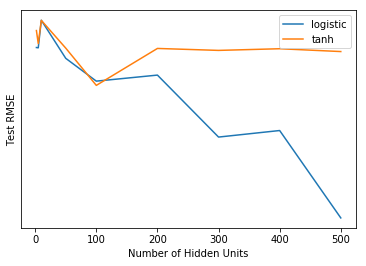

In [35]:
# MLP Regressor Model
# one layer

kf = KFold(5, shuffle=True)
hidden_layers = [2,5,10,50,100,200,300,400,500]

def getRMSE(X, y, hidden_layers, activation_function):
    print(activation_function, ': ')
    
    RMSE = []
    RMSE_min = 1e12
    for i in hidden_layers:
        print('Number of hidden layers = ', i)
        model = MLPRegressor(hidden_layer_sizes=i, activation=activation_function, random_state = 42, max_iter=100000)
        model.fit(X, y)
        pred = model.predict(X)
        RMSE_test = np.sqrt(mean_squared_error(y, pred))
        RMSE.append(RMSE_test)
        if RMSE_test < RMSE_min:
            RMSE_min = RMSE_test
    
    print(RMSE)
    print('Minimum MSE = ', RMSE_min)
    
    ax.plot(hidden_layers, RMSE, label=activation_function)
    ax.set_xlabel('Number of Hidden Units')
    ax.set_ylabel('Test RMSE')
    ax.set_yscale('log')
    plt.legend()
    

fig, ax = plt.subplots()

getRMSE(X, y, hidden_layers, 'logistic')
getRMSE(X, y, hidden_layers, 'tanh')

plt.show()

logistic : 
Number of hidden layers =  (10, 10)


C:\Users\MyLittleGiftToMinya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of hidden layers =  (20, 10)
Number of hidden layers =  (20, 20)
Number of hidden layers =  (50, 50)
Number of hidden layers =  (100, 100)
Number of hidden layers =  (200, 200)
[28443.981591592787, 28444.09875841569, 28380.38820623823, 28378.480785872398, 28417.989732970007, 28384.012590969585]
Minimum MSE =  28378.480785872398
tanh : 
Number of hidden layers =  (10, 10)
Number of hidden layers =  (20, 10)
Number of hidden layers =  (20, 20)
Number of hidden layers =  (50, 50)
Number of hidden layers =  (100, 100)
Number of hidden layers =  (200, 200)
[28788.103795861836, 28443.812738672033, 28380.381475064314, 28575.403698808364, 28457.392518130186, 28367.00906982105]
Minimum MSE =  28367.00906982105


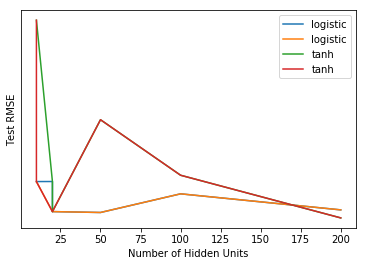

In [37]:
# MLP Regressor Model
# two layers

hidden_layers = [(10,10), (20, 10), (20,20), (50,50), (100,100), (200,200)]

def getMSE(X, y, hidden_layers, activation_function):
    print(activation_function, ': ')
    scheme_id = np.arange(len(hidden_layers))
    RMSE = []
    RMSE_min = 10000000
    
    for i in hidden_layers:
        print('Number of hidden layers = ', i)
        model = MLPRegressor(hidden_layer_sizes=i, activation=activation_function, random_state = 42, max_iter=100000)
        scores = cross_validate(model, X, y, scoring=['neg_mean_squared_error'], cv=kf, return_train_score=True)
        RMSE_test = np.mean(np.sqrt(np.abs(scores['test_neg_mean_squared_error'])))
        RMSE.append(RMSE_test)
        if RMSE_test < RMSE_min:
            RMSE_min = RMSE_test
    
    print(RMSE)
    print('Minimum MSE = ', RMSE_min)
    ax.plot(scheme_id, RMSE, label=activation_function)
    ax.set_yscale('log')
    ax.set_xlabel('Two-layer MLP Schemes')
    ax.set_ylabel('Test MSE')
    plt.legend()

fig, ax = plt.subplots()

getRMSE(X, y, hidden_layers, 'logistic')
getRMSE(X, y, hidden_layers, 'tanh')

plt.show()

# Q12

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

Scaling inputs helps to avoid the situation, when one or several features dominate others in magnitude.

In [67]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
y_1 = np.reshape(y, (X.shape[0],1))
X_scaled, y_scaled = scaler_X.fit_transform(X), scaler_y.fit_transform(y_1)

In [53]:
activation_function = 'tanh'
hidden_layer_size = (200,200,200)
model = MLPRegressor(hidden_layer_sizes=hidden_layer_size, activation=activation_function, random_state = 42, max_iter = 10000)
model.fit(X_scaled, np.reshape(y_scaled, (582)))
pred_scaled = model.predict(X_scaled)

print(pred_scaled.shape)
pred_scaled = np.reshape(pred_scaled, (582,1))

pred = scaler_y.inverse_transform(pred_scaled)


RMSE = np.sqrt(mean_squared_error(y, pred))
print(RMSE)

(582,)
13684.99001333659


Analysis: 
yes

# Q13

In [136]:
# Preprocessing

kf = KFold(5, shuffle=True)

time_1 = datetime.datetime(2015, 2, 1, 8, 0, 0, 0)
time_2 = datetime.datetime(2015, 2, 1, 20, 0, 0, 0)
# convert to UNIX timestamp
# between timemarker_1 and timemarker_2 is super bowl
timemarker_1 = int(mktime(time_1.timetuple()))  # 2/1/2015 8:00AM
timemarker_2 = int(mktime(time_2.timetuple()))  # 2/1/2015 8:00PM

print(timemarker_1)
print(timemarker_2)

1422806400
1422849600


## First Time Period

In [137]:
#initialize time bins, 1-hour window

window = 3600
start_time_1 = min(start_time_list)
end_time_1 = timemarker_1
tweet_dict_1 = defaultdict(list)

tweet_dict_1, time_bins_1 = getDict(start_time_1, end_time_1, window, tweet_dict_1)
X_1, y_1 = getFeatureMat(tweet_dict_1, time_bins_1)

progress:  0 out of 2823738
progress:  10000 out of 2823738
progress:  20000 out of 2823738
progress:  30000 out of 2823738
progress:  40000 out of 2823738
progress:  50000 out of 2823738
progress:  60000 out of 2823738
progress:  70000 out of 2823738
progress:  80000 out of 2823738
progress:  90000 out of 2823738
progress:  100000 out of 2823738
progress:  110000 out of 2823738
progress:  120000 out of 2823738
progress:  130000 out of 2823738
progress:  140000 out of 2823738
progress:  150000 out of 2823738
progress:  160000 out of 2823738
progress:  170000 out of 2823738
progress:  180000 out of 2823738
progress:  190000 out of 2823738
progress:  200000 out of 2823738
progress:  210000 out of 2823738
progress:  220000 out of 2823738
progress:  230000 out of 2823738
progress:  240000 out of 2823738
progress:  250000 out of 2823738
progress:  260000 out of 2823738
progress:  270000 out of 2823738
progress:  280000 out of 2823738
progress:  290000 out of 2823738
progress:  300000 out of

progress:  2450000 out of 2823738
progress:  2460000 out of 2823738
progress:  2470000 out of 2823738
progress:  2480000 out of 2823738
progress:  2490000 out of 2823738
progress:  2500000 out of 2823738
progress:  2510000 out of 2823738
progress:  2520000 out of 2823738
progress:  2530000 out of 2823738
progress:  2540000 out of 2823738
progress:  2550000 out of 2823738
progress:  2560000 out of 2823738
progress:  2570000 out of 2823738
progress:  2580000 out of 2823738
progress:  2590000 out of 2823738
progress:  2600000 out of 2823738
progress:  2610000 out of 2823738
progress:  2620000 out of 2823738
progress:  2630000 out of 2823738
progress:  2640000 out of 2823738
progress:  2650000 out of 2823738
progress:  2660000 out of 2823738
progress:  2670000 out of 2823738
progress:  2680000 out of 2823738
progress:  2690000 out of 2823738
progress:  2700000 out of 2823738
progress:  2710000 out of 2823738
progress:  2720000 out of 2823738
progress:  2730000 out of 2823738
progress:  274

In [138]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
y_temp = np.reshape(y_1, (X_1.shape[0],1))
X_scaled_1, y_scaled_1 = scaler_X.fit_transform(X_1), scaler_y.fit_transform(y_temp)

tuned_param = {'hidden_layer_sizes': [(100,100,100), (20,20,20), (200,200), (100,100), (20,20), 20, 50, 100, 200, 500],
               'activation': ["logistic", "relu", "tanh"],
               'alpha' : [0.01, 0.001, 0.0001],
               'max_iter' : [1000, 2000, 3000, 5000, 10000],
               'random_state' : [42]}

gs_1 = GridSearchCV(MLPRegressor(), param_grid=tuned_param, cv=5,scoring='neg_mean_squared_error')
gs_1.fit(X_scaled_1, np.reshape(y_scaled_1, (435)))

# get best parameters
optimal_parameters_1 = gs_1.best_params_
print('Optimal parameters for MLP Regressor: ', optimal_parameters_1)

Optimal parameters for MLP Regressor:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 100, 'max_iter': 1000, 'random_state': 42}


In [139]:
# use best parameters to train and get MSE
model_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.0001, activation='tanh', max_iter=1000, random_state=42)
model_1.fit(X_scaled_1, np.reshape(y_scaled_1, (435)))
pred_scaled = model_1.predict(X_scaled_1)
pred_scaled = np.reshape(pred_scaled, (435,1))
pred = scaler_y.inverse_transform(pred_scaled)

RMSE_1 = np.sqrt(mean_squared_error(y_1, pred))
print('MSE of scaled data for the first time period with 1-hour windows =', RMSE_1)

MSE of scaled data for the first time period with 1-hour windows = 1700.9232262731555


## Second Time Period

In [140]:
#initialize time bins, 5-min window

window = 5*60
start_time_2 = timemarker_1
end_time_2 = timemarker_2
tweet_dict_2 = defaultdict(list)

tweet_dict_2, time_bins_2 = getDict(start_time_2, end_time_2, window, tweet_dict_2)
X_2, y_2 = getFeatureMat(tweet_dict_2, time_bins_2)

progress:  0 out of 2823738
progress:  10000 out of 2823738
progress:  20000 out of 2823738
progress:  30000 out of 2823738
progress:  40000 out of 2823738
progress:  50000 out of 2823738
progress:  60000 out of 2823738
progress:  70000 out of 2823738
progress:  80000 out of 2823738
progress:  90000 out of 2823738
progress:  100000 out of 2823738
progress:  110000 out of 2823738
progress:  120000 out of 2823738
progress:  130000 out of 2823738
progress:  140000 out of 2823738
progress:  150000 out of 2823738
progress:  160000 out of 2823738
progress:  170000 out of 2823738
progress:  180000 out of 2823738
progress:  190000 out of 2823738
progress:  200000 out of 2823738
progress:  210000 out of 2823738
progress:  220000 out of 2823738
progress:  230000 out of 2823738
progress:  240000 out of 2823738
progress:  250000 out of 2823738
progress:  260000 out of 2823738
progress:  270000 out of 2823738
progress:  280000 out of 2823738
progress:  290000 out of 2823738
progress:  300000 out of

progress:  2450000 out of 2823738
progress:  2460000 out of 2823738
progress:  2470000 out of 2823738
progress:  2480000 out of 2823738
progress:  2490000 out of 2823738
progress:  2500000 out of 2823738
progress:  2510000 out of 2823738
progress:  2520000 out of 2823738
progress:  2530000 out of 2823738
progress:  2540000 out of 2823738
progress:  2550000 out of 2823738
progress:  2560000 out of 2823738
progress:  2570000 out of 2823738
progress:  2580000 out of 2823738
progress:  2590000 out of 2823738
progress:  2600000 out of 2823738
progress:  2610000 out of 2823738
progress:  2620000 out of 2823738
progress:  2630000 out of 2823738
progress:  2640000 out of 2823738
progress:  2650000 out of 2823738
progress:  2660000 out of 2823738
progress:  2670000 out of 2823738
progress:  2680000 out of 2823738
progress:  2690000 out of 2823738
progress:  2700000 out of 2823738
progress:  2710000 out of 2823738
progress:  2720000 out of 2823738
progress:  2730000 out of 2823738
progress:  274

In [141]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
y_temp = np.reshape(y_2, (X_2.shape[0],1))
X_scaled_2, y_scaled_2 = scaler_X.fit_transform(X_2), scaler_y.fit_transform(y_temp)

tuned_param = {'hidden_layer_sizes': [(100,100,100), (20,20,20), (200,200), (100,100), (20,20), 20, 50, 100, 200, 500],
               'activation': ["logistic", "relu", "tanh"],
               'alpha' : [0.01, 0.001, 0.0001],
               'max_iter' : [1000, 2000, 3000, 5000, 10000],
               'random_state' : [42]}

gs_2 = GridSearchCV(MLPRegressor(), param_grid=tuned_param, cv=5,scoring='neg_mean_squared_error')
gs_2.fit(X_scaled_2, np.reshape(y_scaled_2, (143)))
# get best parameters
optimal_parameters_2 = gs_2.best_params_
print('Optimal parameters for MLP Regressor: ', optimal_parameters_2)

Optimal parameters for MLP Regressor:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'max_iter': 1000, 'random_state': 42}


In [142]:
# use best parameters to train and get MSE
model_2 = MLPRegressor(hidden_layer_sizes=(20,20), alpha=0.0001, activation='tanh', max_iter=1000, random_state=42)

model_2.fit(X_scaled_2, np.reshape(y_scaled_2, (143)))
pred_scaled = model_2.predict(X_scaled_2)
pred_scaled = np.reshape(pred_scaled, (143,1))
pred = scaler_y.inverse_transform(pred_scaled)

RMSE_2 = np.sqrt(mean_squared_error(y_2, pred))
print('MSE of scaled data for the second time period with 5-min windows =', RMSE_2)

MSE of scaled data for the second time period with 5-min windows = 4181.166446153538


## Third Time Period

In [222]:
#initialize time bins, 1-hour window

window = 3600
start_time_3 = timemarker_2
end_time_3 = max(end_time_list)
tweet_dict_3 = defaultdict(list)

tweet_dict_3, time_bins_3 = getDict(start_time_3, end_time_3, window, tweet_dict_3)
X_3, y_3 = getFeatureMat(tweet_dict_3, time_bins_3)

progress:  0 out of 2823738
progress:  10000 out of 2823738
progress:  20000 out of 2823738
progress:  30000 out of 2823738
progress:  40000 out of 2823738
progress:  50000 out of 2823738
progress:  60000 out of 2823738
progress:  70000 out of 2823738
progress:  80000 out of 2823738
progress:  90000 out of 2823738
progress:  100000 out of 2823738
progress:  110000 out of 2823738
progress:  120000 out of 2823738
progress:  130000 out of 2823738
progress:  140000 out of 2823738
progress:  150000 out of 2823738
progress:  160000 out of 2823738
progress:  170000 out of 2823738
progress:  180000 out of 2823738
progress:  190000 out of 2823738
progress:  200000 out of 2823738
progress:  210000 out of 2823738
progress:  220000 out of 2823738
progress:  230000 out of 2823738
progress:  240000 out of 2823738
progress:  250000 out of 2823738
progress:  260000 out of 2823738
progress:  270000 out of 2823738
progress:  280000 out of 2823738
progress:  290000 out of 2823738
progress:  300000 out of

progress:  2450000 out of 2823738
progress:  2460000 out of 2823738
progress:  2470000 out of 2823738
progress:  2480000 out of 2823738
progress:  2490000 out of 2823738
progress:  2500000 out of 2823738
progress:  2510000 out of 2823738
progress:  2520000 out of 2823738
progress:  2530000 out of 2823738
progress:  2540000 out of 2823738
progress:  2550000 out of 2823738
progress:  2560000 out of 2823738
progress:  2570000 out of 2823738
progress:  2580000 out of 2823738
progress:  2590000 out of 2823738
progress:  2600000 out of 2823738
progress:  2610000 out of 2823738
progress:  2620000 out of 2823738
progress:  2630000 out of 2823738
progress:  2640000 out of 2823738
progress:  2650000 out of 2823738
progress:  2660000 out of 2823738
progress:  2670000 out of 2823738
progress:  2680000 out of 2823738
progress:  2690000 out of 2823738
progress:  2700000 out of 2823738
progress:  2710000 out of 2823738
progress:  2720000 out of 2823738
progress:  2730000 out of 2823738
progress:  274

In [224]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()
y_temp = np.reshape(y_3, (X_3.shape[0],1))
X_scaled_3, y_scaled_3 = scaler_X.fit_transform(X_3), scaler_y.fit_transform(y_temp)

tuned_param = {'hidden_layer_sizes': [(100,100,100), (20,20,20), (200,200), (100,100), (20,20), 20, 50, 100, 200, 500],
               'activation': ["logistic", "relu", "tanh"],
               'alpha' : [0.01, 0.001, 0.0001],
               'max_iter' : [1000, 2000, 3000, 5000, 10000],
               'random_state' : [42]}

gs_3 = GridSearchCV(MLPRegressor(), param_grid=tuned_param, cv=5,scoring='neg_mean_squared_error')
gs_3.fit(X_scaled_3, np.reshape(y_scaled_3, (101)))
# get best parameters
optimal_parameters_3 = gs_3.best_params_
print('Optimal parameters for MLP Regressor: ', optimal_parameters_3)

Optimal parameters for MLP Regressor:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'max_iter': 1000, 'random_state': 42}


In [225]:
# use best parameters to train and get MSE
model_3 = MLPRegressor(hidden_layer_sizes=(100,100), alpha=0.01, activation='tanh', max_iter=1000, random_state=42)

model_3.fit(X_scaled_3, np.reshape(y_scaled_3, (101)))
pred_scaled = model_3.predict(X_scaled_3)
pred_scaled = np.reshape(pred_scaled, (101,1))
pred = scaler_y.inverse_transform(pred_scaled)

RMSE_3 = np.sqrt(mean_squared_error(y_3, pred))
print('MSE of scaled data for the third time period with 1-hour windows =', RMSE_3)

MSE of scaled data for the third time period with 1-hour windows = 643.1552108153984


# Q14

In [145]:
def getDict_select_rawmat(raw_mat, start_time, end_time, window, tweet_dict):
    #initialize time bins
    time_bins = np.arange(start_time, end_time + window, window)

    for time_bin in time_bins:
        tweet_dict[time_bin] = []
    
    N = raw_mat.shape[0]
    
    for index in range(N):
        if index%10000 == 0:
            print('progress: ', index, 'out of', N)
        tweet = raw_mat[index]
        for i, time_bin in enumerate(time_bins):
            if i < time_bins.shape[0]-1 and time_bins[i] <= tweet[2] < time_bins[i+1]:  
                tweet_dict[time_bin].append(tweet)
                
    return tweet_dict, time_bins


In [275]:
def getX(raw_mat):
    X_test = np.zeros((1,5))
    num_tweets = raw_mat.shape[0]
    num_retweets = 0
    sum_num_followers = 0
    max_num_followers = 0
    time_of_day = raw_mat[-1,-1]
    
    for i in range(raw_mat.shape[0]):
        num_retweets += raw_mat[i,0]
        sum_num_followers += raw_mat[i,1]
        
        if raw_mat[i,1] > max_num_followers:
            max_num_followers = raw_mat[i,1]
            
    X_test = np.array([num_tweets, num_retweets, sum_num_followers, max_num_followers, time_of_day])
    
    return X_test

def getTestFeatureMat(filenames):
    start_time = 0
    start_time_list = []
    end_time = 0
    end_time_list = []
    matrices = []
    
    for filename in filenames:
        file_name = filename + '.txt'
        f = open(file_name, 'r', encoding = 'utf-8')
        print('Loading: ' , file_name)
        
        # initialization
        mat_temp = np.zeros((len(f.readlines()),3))   # 3 parameters: num_retweets, num_followers, time_of_day
        print(mat_temp.shape)
        
        # read line by line for the current file and fill in raw_mat
        file_name = filename + '.txt'
        f = open(file_name, 'r', encoding = 'utf-8')
        for lineNum, line in enumerate(f) : 
            tweet = json.loads(line)

            # get start time and end time of tweets of the current txt file
            if lineNum == 0 :
                start_time_list.append(tweet['citation_date']) 
            
            end_time = tweet['citation_date']
            
            # fill in raw feature matrix 
            # raw_mat_i: for i-th sample
            # 3 columns: 
            # raw_mat[:,0]: num_retweets
            # raw_mat[:,1]: num_followers
            # raw_mat[:,2]: time_of_day
            mat_temp[lineNum][0] = tweet['metrics']['citations']['total'] # num_retweets
            mat_temp[lineNum][1] = tweet['author']['followers'] # num_followers
            mat_temp[lineNum][2] = tweet['citation_date'] # time_of_day
            
        end_time_list.append(end_time)
        matrices.append(mat_temp)
    
    raw_mat_1 = matrices[0] # raw feature matrix for sample 0
    raw_mat_2 = matrices[1] # raw feature matrix for sample 1
    raw_mat_3 = matrices[2] # raw feature matrix for sample 2
    
    # sample 0
    X_test_1 = getX(raw_mat_1)
    
    
    # sample 1
    X_test_2 = getX(raw_mat_2)
    
    # sample 2
    X_test_3 = getX(raw_mat_3)
    
    return X_test_1, X_test_2, X_test_3


In [227]:
def testModel(model, X_test_1, X_test_2, X_test_3):
    y = np.zeros((3))
    y[0] = model.predict(X_test_1)
    y[1] = model.predict(X_test_2)
    y[2] = model.predict(X_test_3)
    
    return y

In [228]:
def getDates(filenames):
    end_time_list = []
    start_time_list = []
    for filename in filenames:
        start_time = 0
        end_time = 0
        matrices = []
        
        file_name = filename + '.txt'
        f = open(file_name, 'r', encoding = 'utf-8')
        print('Loading: ' , file_name)
            
        # read line by line for the current file and fill in raw_mat
        f = open(file_name, 'r', encoding = 'utf-8')
        for lineNum, line in enumerate(f) : 
            tweet = json.loads(line)
        
            # get start time and end time of tweets of the current txt file
            if lineNum == 0 :
                start_time_list.append(tweet['firstpost_date']) 
                
            end_time = tweet['citation_date']
        end_time_list.append(end_time)
        
    return start_time_list, end_time_list


In [229]:
cycle_len = 6

#### Period 1:  Fit a model to train with 6-hour windows, and make prediction on the next hour

In [276]:
window_size = 3600*(cycle_len)
tweet_dict_4_train = defaultdict(list)

tweet_dict_4_train, time_bins_4_train = getDict(start_time_1, end_time_1, window_size, tweet_dict_4_train)
X_4_train, _ = getFeatureMat(tweet_dict_4_train, time_bins_4_train)
print('X shape = ', X_4_train.shape)

y_4_train = y_1[(cycle_len-2)::(cycle_len)]
print('y shape = ', y_4_train.shape)


progress:  0 out of 2823738
progress:  10000 out of 2823738
progress:  20000 out of 2823738
progress:  30000 out of 2823738
progress:  40000 out of 2823738
progress:  50000 out of 2823738
progress:  60000 out of 2823738
progress:  70000 out of 2823738
progress:  80000 out of 2823738
progress:  90000 out of 2823738
progress:  100000 out of 2823738
progress:  110000 out of 2823738
progress:  120000 out of 2823738
progress:  130000 out of 2823738
progress:  140000 out of 2823738
progress:  150000 out of 2823738
progress:  160000 out of 2823738
progress:  170000 out of 2823738
progress:  180000 out of 2823738
progress:  190000 out of 2823738
progress:  200000 out of 2823738
progress:  210000 out of 2823738
progress:  220000 out of 2823738
progress:  230000 out of 2823738
progress:  240000 out of 2823738
progress:  250000 out of 2823738
progress:  260000 out of 2823738
progress:  270000 out of 2823738
progress:  280000 out of 2823738
progress:  290000 out of 2823738
progress:  300000 out of

progress:  2450000 out of 2823738
progress:  2460000 out of 2823738
progress:  2470000 out of 2823738
progress:  2480000 out of 2823738
progress:  2490000 out of 2823738
progress:  2500000 out of 2823738
progress:  2510000 out of 2823738
progress:  2520000 out of 2823738
progress:  2530000 out of 2823738
progress:  2540000 out of 2823738
progress:  2550000 out of 2823738
progress:  2560000 out of 2823738
progress:  2570000 out of 2823738
progress:  2580000 out of 2823738
progress:  2590000 out of 2823738
progress:  2600000 out of 2823738
progress:  2610000 out of 2823738
progress:  2620000 out of 2823738
progress:  2630000 out of 2823738
progress:  2640000 out of 2823738
progress:  2650000 out of 2823738
progress:  2660000 out of 2823738
progress:  2670000 out of 2823738
progress:  2680000 out of 2823738
progress:  2690000 out of 2823738
progress:  2700000 out of 2823738
progress:  2710000 out of 2823738
progress:  2720000 out of 2823738
progress:  2730000 out of 2823738
progress:  274

In [277]:
filenames = ['sample0_period1', 'sample1_period1', 'sample2_period1']

start_time_list, end_time_list = getDates(filenames)

print()
print('Sample 0 start and end date for period 1:')
print('UNIX dataset start date:', start_time_list[0])
print('PST dataset start date:', datetime.datetime.fromtimestamp(start_time_list[0], pst_tz))
print('UNIX dataset end date:', end_time_list[0])
print('PST dataset end date:', datetime.datetime.fromtimestamp(end_time_list[0], pst_tz))
print()
print('Sample 1 start and end date for period 1:')
print('UNIX dataset start date:', start_time_list[1])
print('PST dataset start date:', datetime.datetime.fromtimestamp(start_time_list[1], pst_tz))
print('UNIX dataset end date:', end_time_list[1])
print('PST dataset end date:', datetime.datetime.fromtimestamp(end_time_list[1], pst_tz))
print()
print('Sample 2 start and end date for period 1:')
print('UNIX dataset start date:', start_time_list[2])
print('PST dataset start date:', datetime.datetime.fromtimestamp(start_time_list[2], pst_tz))
print('UNIX dataset end date:', end_time_list[2])
print('PST dataset end date:', datetime.datetime.fromtimestamp(end_time_list[2], pst_tz))

Loading:  sample0_period1.txt
Loading:  sample1_period1.txt
Loading:  sample2_period1.txt

Sample 0 start and end date for period 1:
UNIX dataset start date: 1422709237
PST dataset start date: 2015-01-31 05:00:37-08:00
UNIX dataset end date: 1422729038
PST dataset end date: 2015-01-31 10:30:38-08:00

Sample 1 start and end date for period 1:
UNIX dataset start date: 1422781210
PST dataset start date: 2015-02-01 01:00:10-08:00
UNIX dataset end date: 1422798026
PST dataset end date: 2015-02-01 05:40:26-08:00

Sample 2 start and end date for period 1:
UNIX dataset start date: 1422320759
PST dataset start date: 2015-01-26 17:05:59-08:00
UNIX dataset end date: 1422334141
PST dataset end date: 2015-01-26 20:49:01-08:00


In [278]:
# Train model
clf = RandomForestRegressor(random_state=42)
model_4 = clf.fit(X_4_train, y_4_train)

# Get feature matrix from test data for period 1
filenames = ['sample0_period1', 'sample1_period1', 'sample2_period1']
X_test_1, X_test_2, X_test_3 = getTestFeatureMat(filenames)

# test model for period 1
pred_1 = testModel(model_4, X_test_1.reshape(1, -1), X_test_2.reshape(1, -1), X_test_3.reshape(1, -1))

print(pred_1)

Loading:  sample0_period1.txt
(568, 3)
Loading:  sample1_period1.txt
(2280, 3)
Loading:  sample2_period1.txt
(953, 3)
[182.1 486.2 199.4]


#### Period 2:  Fit a model to train with 30-min windows, and make prediction on the next 5 min

In [279]:
filenames = ['sample0_period2', 'sample1_period2', 'sample2_period2']

start_time_list, end_time_list = getDates(filenames)

print()
print('Sample 0 start and end date for period 2:')
print('UNIX dataset start date:', start_time_list[0])
print('PST dataset start date:', datetime.datetime.fromtimestamp(start_time_list[0], pst_tz))
print('UNIX dataset end date:', end_time_list[0])
print('PST dataset end date:', datetime.datetime.fromtimestamp(end_time_list[0], pst_tz))
print()
print('Sample 1 start and end date for period 2:')
print('UNIX dataset start date:', start_time_list[1])
print('PST dataset start date:', datetime.datetime.fromtimestamp(start_time_list[1], pst_tz))
print('UNIX dataset end date:', end_time_list[1])
print('PST dataset end date:', datetime.datetime.fromtimestamp(end_time_list[1], pst_tz))
print()
print('Sample 2 start and end date for period 2:')
print('UNIX dataset start date:', start_time_list[2])
print('PST dataset start date:', datetime.datetime.fromtimestamp(start_time_list[2], pst_tz))
print('UNIX dataset end date:', end_time_list[2])
print('PST dataset end date:', datetime.datetime.fromtimestamp(end_time_list[2], pst_tz))

Loading:  sample0_period2.txt
Loading:  sample1_period2.txt
Loading:  sample2_period2.txt

Sample 0 start and end date for period 2:
UNIX dataset start date: 1422846005
PST dataset start date: 2015-02-01 19:00:05-08:00
UNIX dataset end date: 1422847788
PST dataset end date: 2015-02-01 19:29:48-08:00

Sample 1 start and end date for period 2:
UNIX dataset start date: 1422822618
PST dataset start date: 2015-02-01 12:30:18-08:00
UNIX dataset end date: 1422824391
PST dataset end date: 2015-02-01 12:59:51-08:00

Sample 2 start and end date for period 2:
UNIX dataset start date: 1422808212
PST dataset start date: 2015-02-01 08:30:12-08:00
UNIX dataset end date: 1422809955
PST dataset end date: 2015-02-01 08:59:15-08:00


In [280]:
tweet_dict_5_train = defaultdict(list)
window_size = (cycle_len)*(5*60)

tweet_dict_5_train, time_bins_5_train = getDict(start_time_2, end_time_2, window_size, tweet_dict_5_train)
X_5_train, _ = getFeatureMat(tweet_dict_5_train, time_bins_5_train)
print(X_5_train.shape)

y_5_train = y_2[(cycle_len-2)::(cycle_len)]
y_5_train = y_5_train[:-1]
print(y_5_train.shape)

progress:  0 out of 2823738
progress:  10000 out of 2823738
progress:  20000 out of 2823738
progress:  30000 out of 2823738
progress:  40000 out of 2823738
progress:  50000 out of 2823738
progress:  60000 out of 2823738
progress:  70000 out of 2823738
progress:  80000 out of 2823738
progress:  90000 out of 2823738
progress:  100000 out of 2823738
progress:  110000 out of 2823738
progress:  120000 out of 2823738
progress:  130000 out of 2823738
progress:  140000 out of 2823738
progress:  150000 out of 2823738
progress:  160000 out of 2823738
progress:  170000 out of 2823738
progress:  180000 out of 2823738
progress:  190000 out of 2823738
progress:  200000 out of 2823738
progress:  210000 out of 2823738
progress:  220000 out of 2823738
progress:  230000 out of 2823738
progress:  240000 out of 2823738
progress:  250000 out of 2823738
progress:  260000 out of 2823738
progress:  270000 out of 2823738
progress:  280000 out of 2823738
progress:  290000 out of 2823738
progress:  300000 out of

progress:  2450000 out of 2823738
progress:  2460000 out of 2823738
progress:  2470000 out of 2823738
progress:  2480000 out of 2823738
progress:  2490000 out of 2823738
progress:  2500000 out of 2823738
progress:  2510000 out of 2823738
progress:  2520000 out of 2823738
progress:  2530000 out of 2823738
progress:  2540000 out of 2823738
progress:  2550000 out of 2823738
progress:  2560000 out of 2823738
progress:  2570000 out of 2823738
progress:  2580000 out of 2823738
progress:  2590000 out of 2823738
progress:  2600000 out of 2823738
progress:  2610000 out of 2823738
progress:  2620000 out of 2823738
progress:  2630000 out of 2823738
progress:  2640000 out of 2823738
progress:  2650000 out of 2823738
progress:  2660000 out of 2823738
progress:  2670000 out of 2823738
progress:  2680000 out of 2823738
progress:  2690000 out of 2823738
progress:  2700000 out of 2823738
progress:  2710000 out of 2823738
progress:  2720000 out of 2823738
progress:  2730000 out of 2823738
progress:  274

In [281]:
# Train model
clf = RandomForestRegressor(random_state=42)
model_5 = clf.fit(X_5_train, y_5_train)

# Get feature matrix from test data for period 2
filenames = ['sample0_period2', 'sample1_period2', 'sample2_period2']
X_test_1, X_test_2, X_test_3 = getTestFeatureMat(filenames)

# test model for period 1
pred_2 = testModel(model_5, X_test_1.reshape(1, -1), X_test_2.reshape(1, -1), X_test_3.reshape(1, -1))

print(pred_2)

Loading:  sample0_period2.txt
(13377, 3)
Loading:  sample1_period2.txt
(5549, 3)
Loading:  sample2_period2.txt
(152, 3)
[3846.6 3866.5  967.3]


#### Period 3:  Fit a model to train with 6-hour windows, and make prediction on the next hour

In [282]:
filenames = ['sample0_period3', 'sample1_period3', 'sample2_period3']

start_time_list, end_time_list = getDates(filenames)

print()
print('Sample 0 start and end date for period 3:')
print('UNIX dataset start date:', start_time_list[0])
print('PST dataset start date:', datetime.datetime.fromtimestamp(start_time_list[0], pst_tz))
print('UNIX dataset end date:', end_time_list[0])
print('PST dataset end date:', datetime.datetime.fromtimestamp(end_time_list[0], pst_tz))
print()
print('Sample 1 start and end date for period 3:')
print('UNIX dataset start date:', start_time_list[1])
print('PST dataset start date:', datetime.datetime.fromtimestamp(start_time_list[1], pst_tz))
print('UNIX dataset end date:', end_time_list[1])
print('PST dataset end date:', datetime.datetime.fromtimestamp(end_time_list[1], pst_tz))
print()
print('Sample 2 start and end date for period 3:')
print('UNIX dataset start date:', start_time_list[2])
print('PST dataset start date:', datetime.datetime.fromtimestamp(start_time_list[2], pst_tz))
print()
print('UNIX dataset end date:', end_time_list[2])
print('PST dataset end date:', datetime.datetime.fromtimestamp(end_time_list[2], pst_tz))

Loading:  sample0_period3.txt
Loading:  sample1_period3.txt
Loading:  sample2_period3.txt

Sample 0 start and end date for period 3:
UNIX dataset start date: 1423036816
PST dataset start date: 2015-02-04 00:00:16-08:00
UNIX dataset end date: 1423057567
PST dataset end date: 2015-02-04 05:46:07-08:00

Sample 1 start and end date for period 3:
UNIX dataset start date: 1423195440
PST dataset start date: 2015-02-05 20:04:00-08:00
UNIX dataset end date: 1423216204
PST dataset end date: 2015-02-06 01:50:04-08:00

Sample 2 start and end date for period 3:
UNIX dataset start date: 1423184404
PST dataset start date: 2015-02-05 17:00:04-08:00

UNIX dataset end date: 1423204512
PST dataset end date: 2015-02-05 22:35:12-08:00


In [283]:
tweet_dict_6_train = defaultdict(list)
window_size = (cycle_len)*3600

tweet_dict_6_train, time_bins_6_train = getDict(start_time_3, end_time_3, window_size, tweet_dict_6_train)
X_6_train, _ = getFeatureMat(tweet_dict_6_train, time_bins_6_train)
print(X_6_train.shape)

y_6_train = y_3[(cycle_len-2)::(cycle_len)]
y_6_train = y_6_train[:-1]
print(y_6_train.shape)

progress:  0 out of 2823738
progress:  10000 out of 2823738
progress:  20000 out of 2823738
progress:  30000 out of 2823738
progress:  40000 out of 2823738
progress:  50000 out of 2823738
progress:  60000 out of 2823738
progress:  70000 out of 2823738
progress:  80000 out of 2823738
progress:  90000 out of 2823738
progress:  100000 out of 2823738
progress:  110000 out of 2823738
progress:  120000 out of 2823738
progress:  130000 out of 2823738
progress:  140000 out of 2823738
progress:  150000 out of 2823738
progress:  160000 out of 2823738
progress:  170000 out of 2823738
progress:  180000 out of 2823738
progress:  190000 out of 2823738
progress:  200000 out of 2823738
progress:  210000 out of 2823738
progress:  220000 out of 2823738
progress:  230000 out of 2823738
progress:  240000 out of 2823738
progress:  250000 out of 2823738
progress:  260000 out of 2823738
progress:  270000 out of 2823738
progress:  280000 out of 2823738
progress:  290000 out of 2823738
progress:  300000 out of

progress:  2450000 out of 2823738
progress:  2460000 out of 2823738
progress:  2470000 out of 2823738
progress:  2480000 out of 2823738
progress:  2490000 out of 2823738
progress:  2500000 out of 2823738
progress:  2510000 out of 2823738
progress:  2520000 out of 2823738
progress:  2530000 out of 2823738
progress:  2540000 out of 2823738
progress:  2550000 out of 2823738
progress:  2560000 out of 2823738
progress:  2570000 out of 2823738
progress:  2580000 out of 2823738
progress:  2590000 out of 2823738
progress:  2600000 out of 2823738
progress:  2610000 out of 2823738
progress:  2620000 out of 2823738
progress:  2630000 out of 2823738
progress:  2640000 out of 2823738
progress:  2650000 out of 2823738
progress:  2660000 out of 2823738
progress:  2670000 out of 2823738
progress:  2680000 out of 2823738
progress:  2690000 out of 2823738
progress:  2700000 out of 2823738
progress:  2710000 out of 2823738
progress:  2720000 out of 2823738
progress:  2730000 out of 2823738
progress:  274

In [286]:
# Train model
clf = RandomForestRegressor(random_state=42)
model_6 = clf.fit(X_6_train, y_6_train)

# Get feature matrix from test data for period 2
filenames = ['sample0_period3', 'sample1_period3', 'sample2_period3']
X_test_1, X_test_2, X_test_3 = getTestFeatureMat(filenames)

# test model for period 1
pred_3 = testModel(model_6, X_test_1.reshape(1, -1), X_test_2.reshape(1, -1), X_test_3.reshape(1, -1))

print(pred_3)

Loading:  sample0_period3.txt
(410, 3)
Loading:  sample1_period3.txt
(305, 3)
Loading:  sample2_period3.txt
(399, 3)
[3387.7 3387.7 3387.7]


# Part 2: Fan Base Prediction

## Load dataset

In [1]:
import json

file_name = 'tweets_#superbowl.txt'


locations_MA = ['MA', ' MA', 'Massachusetts', 'Boston', 'Cambridge', 'Worcester', 'Marlborough',
               'Salem', 'Beverly', 'Yarmouth', 'Watertown', 'New Bedford', 'Waltham', 'Natick',
               'Cape Cod', 'Lowell', 'Quincy', 'Brookline', 'Somerville','Springfield', 'amherst',
               'framingham']
locations_WA = ['WA', ' WA', 'Seattle', 'Washington', 'Kirkland', 'Perth', 'Woodinville', 'Spokane', 'Pullman',
               'Renton', 'Everett','Puyallup', 'Olympia', 'Redmond', 'Bellevue', 'Bellingham',
               'Vancouver', 'Tacoma', 'Spokane', 'auburn', 'kennewick', 'kent', 'yakima']



In [2]:
texts = []
locations = []        #0 for MA and 1 for WA

def from_MA(loc):
    for x in locations_MA:
        if(x in loc):
            return True
    return False

def from_WA(loc):
    for x in locations_WA:
        if(x in loc):
            return True
    return False

locs_MA = []
locs_WA = []

filestream = open(file_name, 'r', encoding = 'utf-8')
for line in filestream:
    tweet = json.loads(line)
    text = tweet['tweet']['text']

    loc = tweet['tweet']['user']['location']
    
    if from_MA(loc):
        texts.append(text)
        locations.append(0)
        locs_MA.append(0)
        
    elif from_WA(loc):
        texts.append(text)
        locations.append(1)
        locs_WA.append(0)
        
filestream.close()

In [3]:
print(len(texts))
#print(len(locs_MA))
#print(len(locs_WA))

55355


## Process Data

In [5]:
stop_words = text.ENGLISH_STOP_WORDS
#stop_words_skt = text.ENGLISH_STOP_WORDS
#stop_words_en = stopwords.words('english')
#stop_words = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

def stem_tokenizer(text):
    stemmer = SnowballStemmer("english")
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    words = text.split()
    stemmed = [stemmer.stem(item) for item in words]
    words_new = []
    for word in stemmed:
        if re.search('[a-z]{2,}',word):
            words_new.append(word)
    return words_new

def produce_pipeline(MIN_DF, CLF):
    pipe = Pipeline([('vect', CountVectorizer(analyzer = 'word', tokenizer = stem_tokenizer, stop_words = stop_words, min_df = MIN_DF)),
                     ('tfidf', TfidfTransformer()),
                     ('reduce_dim', NMF(n_components = 50, init = 'random', random_state = 0)),
                     ('clf', CLF)])
    return pipe


def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)
    
    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.6', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.set_title('ROC Curve')

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

    plt.show()

    
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without Normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '%.2f' % cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j]>thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def compute_and_plot_confusion_matrix(test_label, test_predicted):
    cnf_matrix = confusion_matrix(test_label, test_predicted)
    np.set_printoptions(precision = 2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes = bclasses, title = 'Confusion Matrix without Normalization')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes = bclasses, normalize = True, title = 'Normalized Confusion Matrix')
    plt.show()

In [19]:
vectorizer = CountVectorizer(analyzer = 'word', tokenizer = stem_tokenizer, stop_words = stop_words, min_df = 2)
tfidf_transformer = TfidfTransformer()

svd = TruncatedSVD(n_components=50, algorithm='arpack')
nmf = NMF(n_components=50, init='random', random_state=0)
normalizer = Normalizer(norm = 'l2', copy=False)

bclasses = ['Massachusetts','Washington']

X_train, X_test, y_train, y_test = train_test_split(texts, locations, train_size=0.9, random_state=42)
pipe = Pipeline([('vect', vectorizer),
                 ('tfidf', tfidf_transformer),
                 ('svd', svd),
                 ('norm', normalizer)])

train_svd_data = pipe.fit_transform(X_train)
test_svd_data = pipe.fit_transform(X_test)

C:\Users\nobod\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\nobod\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twent

## Linear SVM Classifier

In [7]:
print("Linear SVM")
svm = SVC(kernel='linear', probability=True, C=0.025)
print("---")
svm.fit(train_svd_data, y_train)

Linear SVM
---


SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
test_score = svm.predict_proba(test_svd_data)
test_predict = svm.predict(test_svd_data)

fpr, tpr, threshold = roc_curve(y_test, test_score[:,1])

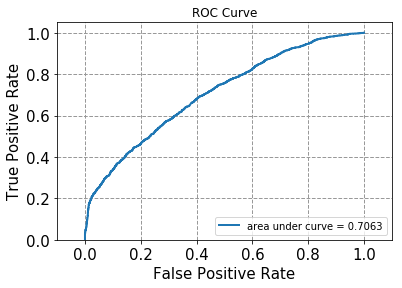

Confusion Matrix without Normalization
[[1220 1191]
 [ 772 2353]]
Normalized Confusion Matrix
[[0.51 0.49]
 [0.25 0.75]]


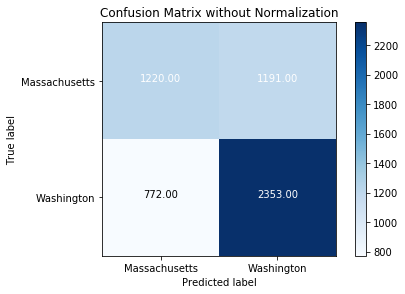

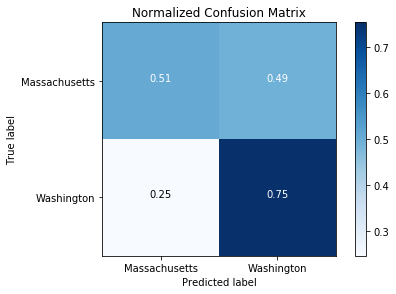

Accuracy: 0.6454118497109826
Recall: 0.75296
Precision: 0.6639390519187359


In [9]:
plot_roc(fpr, tpr)
compute_and_plot_confusion_matrix(y_test, test_predict)

accuracy = accuracy_score(y_test, test_predict)
print('Accuracy:',accuracy)

recall = recall_score(y_test, test_predict)
print('Recall:',recall)

precision = precision_score(y_test, test_predict)
print('Precision:',precision)

## MultinomialNB

In [28]:
X=texts
y=locations

X = vectorizer.fit_transform(X)
X = tfidf_transformer.fit_transform(X)
X = nmf.fit_transform(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

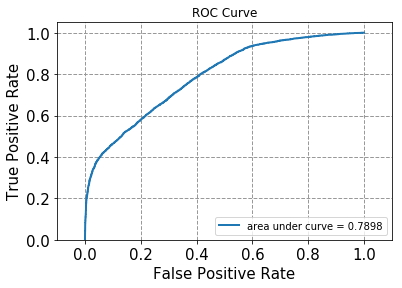

Confusion Matrix without Normalization
[[ 385 5613]
 [  33 7808]]
Normalized Confusion Matrix
[[0.06 0.94]
 [0.   1.  ]]


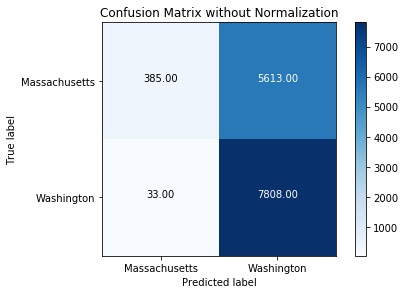

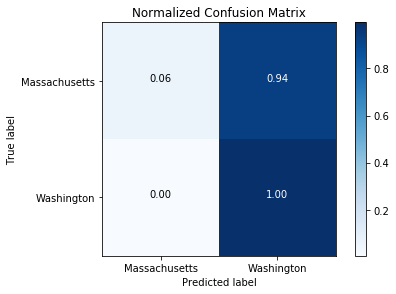

Accuracy: 0.5920225449815738
Recall: 0.9957913531437317
Precision: 0.5817748304895314


In [29]:
clf = MultinomialNB().fit(X_train, y_train)

test_score = clf.predict_proba(X_test)
test_predict = clf.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test, test_score[:,1])

plot_roc(fpr, tpr)
compute_and_plot_confusion_matrix(y_test, test_predict)

accuracy = accuracy_score(y_test, test_predict)
print('Accuracy:',accuracy)

recall = recall_score(y_test, test_predict)
print('Recall:',recall)

precision = precision_score(y_test, test_predict)
print('Precision:',precision)

## GaussianNB

In [24]:
X=texts
y=locations

X = vectorizer.fit_transform(X)
X = tfidf_transformer.fit_transform(X)
X = svd.fit_transform(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


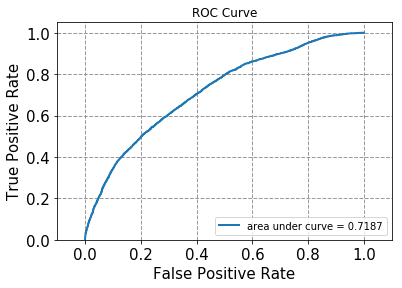

Confusion Matrix without Normalization
[[2969 3029]
 [1568 6273]]
Normalized Confusion Matrix
[[0.49 0.51]
 [0.2  0.8 ]]


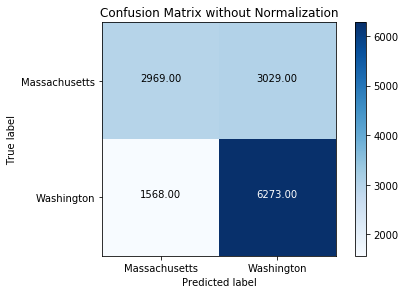

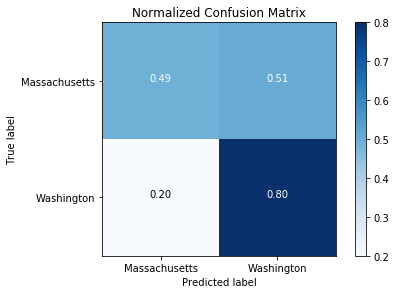

Accuracy: 0.6678228195678878
Recall: 0.800025506950644
Precision: 0.6743711029886046


In [25]:

clf3 = GaussianNB().fit(X_train, y_train)

test_score = clf3.predict_proba(X_test)
test_predict = clf3.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test, test_score[:,1])

plot_roc(fpr, tpr)
compute_and_plot_confusion_matrix(y_test, test_predict)

accuracy = accuracy_score(y_test, test_predict)
print('Accuracy:',accuracy)

recall = recall_score(y_test, test_predict)
print('Recall:',recall)

precision = precision_score(y_test, test_predict)
print('Precision:',precision)

## Logistic Regression

In [34]:
X=texts
y=locations

X = vectorizer.fit_transform(X)
X = tfidf_transformer.fit_transform(X)
X = svd.fit_transform(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

C:\Users\nobod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


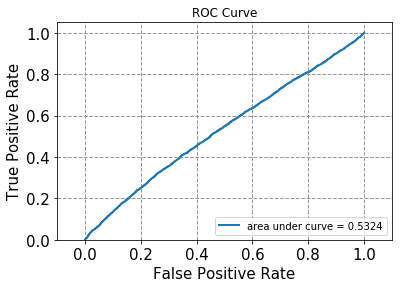

Confusion Matrix without Normalization
[[ 739 5259]
 [ 971 6870]]
Normalized Confusion Matrix
[[0.12 0.88]
 [0.12 0.88]]


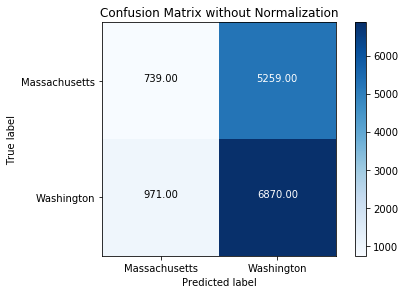

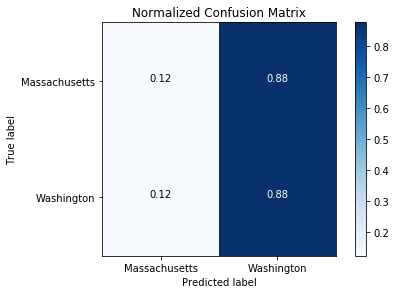

Accuracy: 0.5498229640870005
Recall: 0.8761637546231348
Precision: 0.5664110808805343


In [35]:
logistic = LogisticRegression(penalty='l2', C = 0.001)
logistic.fit(X_train, y_train)

test_score = clf3.predict_proba(X_test)
test_predict = clf3.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test, test_score[:,1])

plot_roc(fpr, tpr)
compute_and_plot_confusion_matrix(y_test, test_predict)

accuracy = accuracy_score(y_test, test_predict)
print('Accuracy:',accuracy)

recall = recall_score(y_test, test_predict)
print('Recall:',recall)

precision = precision_score(y_test, test_predict)
print('Precision:',precision)

# Predict evolution of tweet sentiment for each hashtag

In [ ]:
import regex as re

In [5]:
def cleanTweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def plot_num_tweets_per_hour(file_name, hashtag_name):  
    # Store the number of tweets in each hour
    hour_list = []
    
    # load the json object list    
    f = open(file_name, 'r', encoding = 'utf-8')
    
    for lineNum, line in enumerate(f) : 
        eachTweet = json.loads(line)
        post_time = eachTweet['citation_date']
        mdh = datetime.fromtimestamp(post_time, pst_tz).strftime("%m-%d-%H")
        hour_list.append(mdh)
        
        
    hour_list = np.unique(hour_list)
    # form a map, key: date, value: num of tweets
    positive_map = {i : 0 for i in hour_list}
    negative_map = {i : 0 for i in hour_list}
        
    f = open(file_name, 'r', encoding = 'utf-8')

    for lineNum, line in enumerate(f) :
        tweet = json.loads(line)
        post_time = tweet['citation_date']
        mdh = datetime.fromtimestamp(post_time, pst_tz).strftime("%m-%d-%H")
        
        tweet_text = tweet['tweet']['text']
        tweet_analysis = TextBlob(cleanTweet(tweet_text))
        sentiment = tweet_analysis.sentiment.polarity
        
        if sentiment > 0:
            positive_map[mdh] = positive_map[mdh] + 1
        elif sentiment < 0:
            negative_map[mdh] = negative_map[mdh] + 1
        
    f.close()
    
    # plot the figure
    plt.figure()
    plt.bar(range(len(hour_list)), positive_map.values(), width=1)
    plt.xlabel('Hour')
    plt.ylabel('Number of positive tweets')
    plt.title(('Number of positive tweets per hour for ' + hashtag_name))
    #plt.xticks([0,int(len(hour_list)/2),len(hour_list)],[hour_list[0],hour_list[int(len(hour_list)/2)-1],hour_list[len(hour_list)-1]])
    plt.show()
    
    plt.figure()
    plt.bar(range(len(hour_list)), negative_map.values(), width=1)
    plt.xlabel('Hour')
    plt.ylabel('Number of negative tweets')
    plt.title(('Number of negative tweets per hour for ' + hashtag_name))
    #plt.xticks([0,int(len(hour_list)/2),len(hour_list)],[hour_list[0],hour_list[int(len(hour_list)/2)-1],hour_list[len(hour_list)-1]]) 
    plt.show()

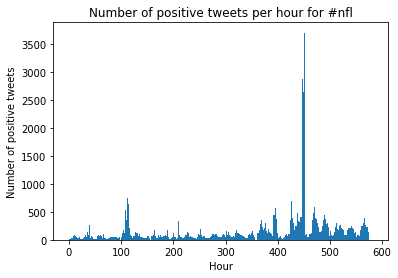

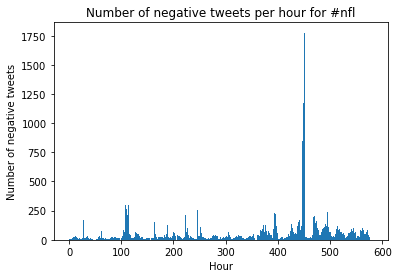

In [6]:
plot_num_tweets_per_hour('tweets_#nfl.txt', '#nfl')

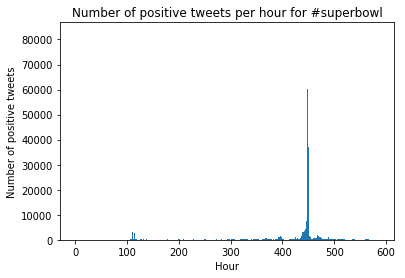

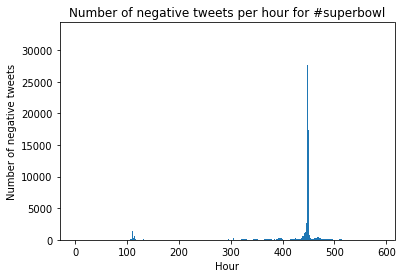

In [7]:
plot_num_tweets_per_hour('tweets_#superbowl.txt', '#superbowl')

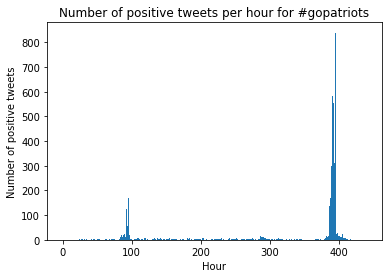

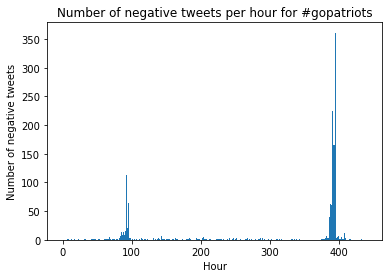

In [8]:
plot_num_tweets_per_hour('tweets_#gopatriots.txt', '#gopatriots')

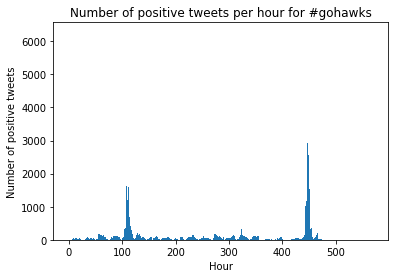

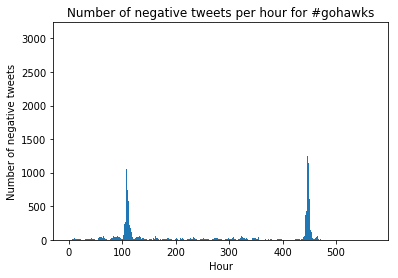

In [9]:
plot_num_tweets_per_hour('tweets_#gohawks.txt', '#gohawks')

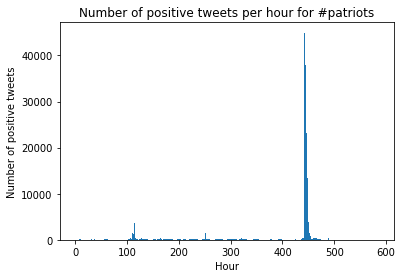

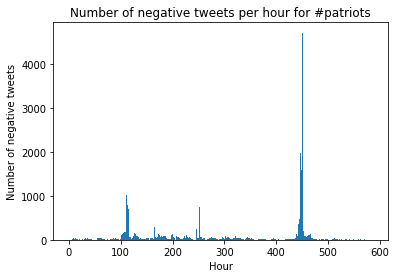

In [10]:
plot_num_tweets_per_hour('tweets_#patriots.txt', '#patriots')

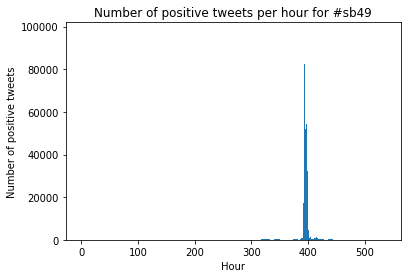

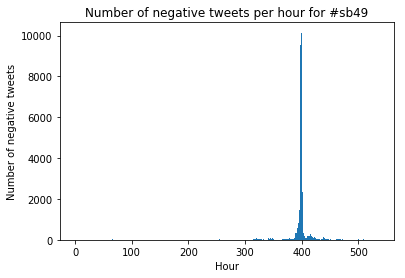

In [11]:
plot_num_tweets_per_hour('tweets_#sb49.txt', '#sb49')

## Below is just a test: Predict if a team won or lost based on the tweets sentiment
 It didn't work very well because we only have the data for one match.

In [8]:
import json

hashtags = ['gohawks', 'gopatriots']
#hashtags = ['gohawks']

data = {}

for hashtag in hashtags:
    file_name = 'tweets_#' + hashtag + '.txt'
    filestream = open(file_name, 'r', encoding = 'utf-8')
    
    tweets = []
    for line in filestream:
        tweet = json.loads(line)
        tweets.append(tweet)
        
    data[hashtag] = tweets
    filestream.close()

In [10]:
from textblob import TextBlob
import regex as re
import numpy as np

def cleanTweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

row = []

for hashtag in hashtags:
    len_2 = 0
    for tweet in data[hashtag]:  
        positives, negatives, retweets = 0, 0, 0
        tweet_analysis = TextBlob(cleanTweet(tweet['tweet']['text']))
        sentiment = tweet_analysis.sentiment.polarity
        
        if sentiment > 0:
            positives = 1
        elif sentiment < 0:
            negatives = 1
            
        retweets = tweet['metrics']['citations']['total']
        
        len_2 += 1
        
        temp = [positives, negatives, retweets]
        row.append(temp)  
    
X = np.array(row)
y = np.array([0] * len(X)) # Seahwaks lost
y[len(X)-len_2:len(X)] = 1 # Patriots won

In [26]:
print(X.shape)
print(y.shape)
print(len_2)

(192633, 3)
(192633,)
23511


In [19]:
from sklearn.metrics import auc, confusion_matrix, recall_score, roc_curve, precision_score, accuracy_score
from matplotlib import pyplot as plt
import itertools

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)
    
    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.6', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.set_title('ROC Curve')

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

    plt.show()
    
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without Normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '%.2f' % cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j]>thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def compute_and_plot_confusion_matrix(test_label, test_predicted, bclasses):
    cnf_matrix = confusion_matrix(test_label, test_predicted)
    np.set_printoptions(precision = 2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes = bclasses, title = 'Confusion Matrix without Normalization')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes = bclasses, normalize = True, title = 'Normalized Confusion Matrix')
    plt.show()

C:\Users\nobod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


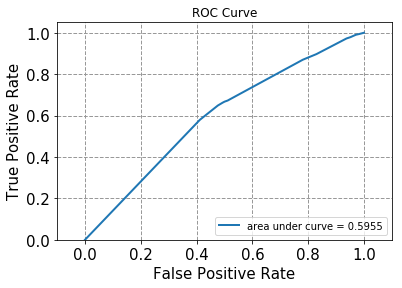

Confusion Matrix without Normalization
[[169122      0]
 [ 23511      0]]
Normalized Confusion Matrix
[[1. 0.]
 [1. 0.]]


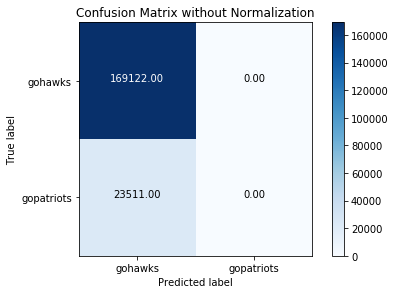

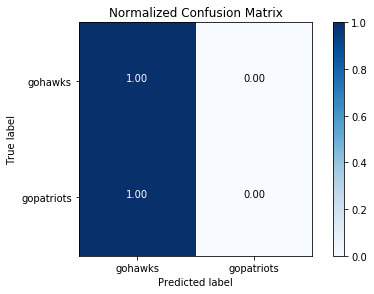

Accuracy: 0.8779492610300416
Recall: 0.0
Precision: 0.0


C:\Users\nobod\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X, y)

y_pred_prob = logistic.predict_proba(X)
y_pred = logistic.predict(X)

fpr, tpr, threshold = roc_curve(y, y_pred_prob[:,1])

plot_roc(fpr, tpr)
compute_and_plot_confusion_matrix(y, y_pred, hashtags)

accuracy = accuracy_score(y, y_pred)
print('Accuracy:',accuracy)

recall = recall_score(y, y_pred)
print('Recall:',recall)

precision = precision_score(y, y_pred)
print('Precision:',precision)